In [2]:
%load_ext autoreload
%autoreload 2

from Shared.shared import *
from Shared.specific_CNB_sim import *

sim_name = f"Dopri5_1k"
sim_folder = f"sim_output/{sim_name}"
fig_folder = f"figures_local/{sim_name}"
Cl_folder = f"Shared/Cls"
nu_m_range = jnp.load(f"{sim_folder}/neutrino_massrange_eV.npy")
nu_m_picks = jnp.array([0.01, 0.05, 0.1, 0.2, 0.3])*Params.eV
simdata = SimData(sim_folder)

z_int_steps = jnp.load(f"{sim_folder}/z_int_steps.npy")
s_int_steps = jnp.load(f"{sim_folder}/s_int_steps.npy")

#! Broken halos: either snapshot info missing or anomalous number densities
exclude_nums = jnp.array([
    20,  # halo with missing/broken snapshot info
    23,  # halo with anomalous number densities (~0s on almost all pixels)
    24,  # anomalous "compactified into 1 cell" DM halo
    25,  # anomalous "compactified into 1 cell" DM halo
])
halo_nums = [x for x in range(1, 31) if x not in exclude_nums]


# Fermi-Dirac distribution assumption
# note: total densities are computed for length 50 mass range
pix_dens_FD = jnp.load(f"{sim_folder}/pixel_densities.npy")[tuple(halo_nums),...]
tot_dens_FD = jnp.load(f"{sim_folder}/total_densities.npy")[tuple(halo_nums),...]

# pix_dens_FD = jnp.delete(pix_dens_FD, exclude_nums, axis=0)
# tot_dens_FD = jnp.delete(tot_dens_FD, exclude_nums, axis=0)
print(pix_dens_FD.shape)
print(tot_dens_FD.shape)

# Incl. primordial fluctuations, for all halos with 1 seed
# note: all sky densities are computed for 5 specific masses
pix_dens_PF_halos = jnp.load(f"{sim_folder}/pixel_densities_incl_PFs.npy")[tuple(halo_nums),...]
tot_dens_PF_halos = jnp.load(f"{sim_folder}/total_densities_incl_PFs.npy")[tuple(halo_nums),...]

#! random phases for momentum bins tests
# pix_dens_PF_halos = jnp.load(
#     f"{sim_folder}/pixel_densities_incl_PFs_random_phases.npy")[tuple(halo_nums),...]
# tot_dens_PF_halos = jnp.load(
#     f"{sim_folder}/total_densities_incl_PFs_random_phases.npy")[tuple(halo_nums),...]


# pix_dens_PF_halos = jnp.delete(pix_dens_PF_halos, exclude_nums, axis=0)
# tot_dens_PF_halos = jnp.delete(tot_dens_PF_halos, exclude_nums, axis=0)
print(pix_dens_PF_halos.shape)
print(tot_dens_PF_halos.shape)

# Incl. primordial fluctuations, for all halos with 1 seed
# note: all sky densities are computed for 5 specific masses
pix_dens_PF_seeds = jnp.array(
    [jnp.load(f"{sim_folder}/pixel_densities_incl_PFs_seeds_halo{halo_j}.npy")
     for halo_j in halo_nums])
tot_dens_PF_seeds = jnp.array(
    [jnp.load(f"{sim_folder}/total_densities_incl_PFs_seeds_halo{halo_j}.npy")
     for halo_j in halo_nums])

#! random phases for momentum bins tests
# pix_dens_PF_seeds = jnp.array(
#     [jnp.load(f"{sim_folder}/pixel_densities_incl_PFs_seeds_halo{halo_j}_random_phases.npy")
#      for halo_j in halo_nums])
# tot_dens_PF_seeds = jnp.array(
#     [jnp.load(f"{sim_folder}/total_densities_incl_PFs_seeds_halo{halo_j}_random_phases.npy")
#      for halo_j in halo_nums])


print(pix_dens_PF_seeds.shape)
print(tot_dens_PF_seeds.shape)

# Deltas_halos = jnp.load(f"{sim_folder}/Deltas_halos.npy")
# print(Deltas_halos.shape)

# Deltas_seeds = jnp.load(f"{sim_folder}/Deltas_seeds.npy")
# print(Deltas_seeds.shape)


#! some change/bug in the sim_execute script, now FD also only has 5 masses instead of 50.

(26, 5, 768)
(26, 50)
(26, 5, 768)
(26, 5)
(26, 10, 5, 768)
(26, 10, 5)


### Smallest cells

In [157]:
cell_g = jnp.load(f"Data/halo_grids/cell_gen_origID29_snap_0036.npy")
print(cell_g.shape)
print(jnp.unique(cell_g))
grid_l = jnp.load(f"Data/halo_grids/snaps_GRID_L_halo10.npy")
print(grid_l.shape)
print(jnp.unique(grid_l)/Params.kpc)
print(jnp.unique(grid_l)[-1]/Params.kpc / (2**8))

(2444,)
[1 2 3 4 5 6 7]
(25,)
[ 37.  72.  75.  77.  95.  99. 117. 130. 153. 166. 167. 187. 188. 234.
 235. 273. 274. 297. 310. 333. 344. 380. 405. 409. 421.]
1.64453125


## Special Functions

In [ ]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import numpy as np

# Define the cosmology model
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

def age_to_redshift(age_gyr):
    """
    Converts the age of the Universe (in Gyr) to redshift.
    
    Parameters:
    age_gyr (float): Age of the Universe in gigayears (Gyr).
    
    Returns:
    float: Corresponding redshift.
    """
    # Convert age to redshift
    age = age_gyr * u.Gyr
    
    # Ensure the input age is within valid range
    if age_gyr < 0 or age_gyr > cosmo.age(0).value:
        raise ValueError("Age must be between 0 and the age of the Universe today.")
    
    # Create an array of redshifts to interpolate over
    z_vals = np.logspace(-5, 5, 10000)
    age_vals = cosmo.age(z_vals).value  # Get corresponding ages for these redshifts
    
    # Interpolate to find the redshift for the given age
    redshift = np.interp(age_gyr, age_vals[::-1], z_vals[::-1])
    return redshift

# Example usage
age_Universe = cosmo.age(0).value
age_today = age_Universe  # Gyr
redshift_today = age_to_redshift(age_today)
print(f"Redshift for age {age_today} Gyr: {redshift_today}")

age_cmb = 0.00038  # Gyr
redshift_cmb = age_to_redshift(age_cmb)
print(f"Redshift for age {age_cmb} Gyr: {redshift_cmb}")

age_cmb = 0.00038  # Gyr
redshift_cmb = age_to_redshift(age_cmb)
print(f"Redshift for age {age_cmb} Gyr: {redshift_cmb}")


def redshift_to_age(z):
    """
    Converts redshift to the age of the Universe.
    
    Parameters:
    z (float): Redshift.
    
    Returns:
    float: Age of the Universe in gigayears (Gyr).
    """
    # Calculate the age of the Universe at the given redshift
    age = cosmo.age(z).to(u.Gyr).value
    return age

# Example usage
redshift_today = 0
age_today = redshift_to_age(redshift_today)
print(f"Age of the Universe at redshift {redshift_today}: {age_today} Gyr")

redshift_cmb = 1100
age_cmb = redshift_to_age(redshift_cmb)
print(f"Age of the Universe at redshift {redshift_cmb}: {age_cmb} Gyr")

redshift_4 = 4
age_4 = redshift_to_age(redshift_4)
print(f"Age of the Universe at redshift {redshift_4}: {age_4*1e3} Myr")

In [ ]:
zeds = jnp.load(f"{sim_folder}/zeds_snaps.npy")
print(zeds, zeds.shape)
zeds = jnp.load(f"{sim_folder}/z_int_steps.npy")
print(zeds, zeds.shape)

## Perturbative breakdown

### Redshift 4

(20,)
(20,)


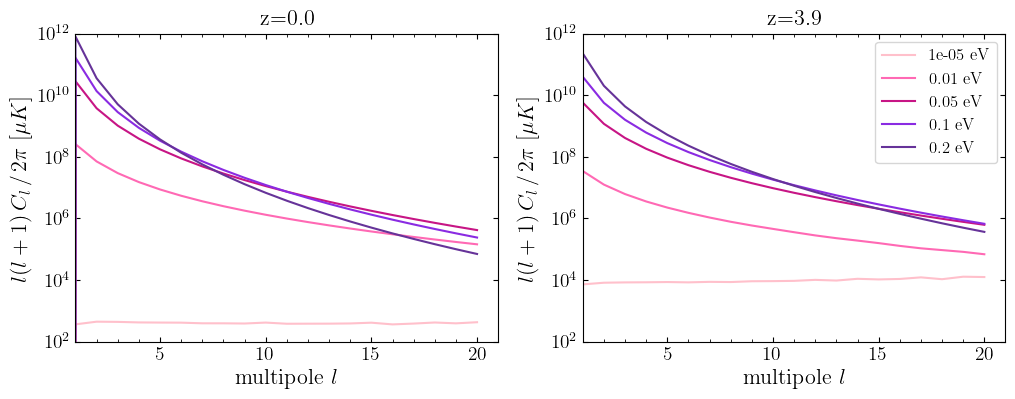

In [58]:
fig = plt.figure(figsize=(12,4))
fig.tight_layout()

violet_colors_incl0 = [
    "pink",
    "hotpink", 
    "mediumvioletred", 
    "blueviolet",
    "rebeccapurple",
]

for i, z_cut in enumerate(
    (
        0.00, 
        3.90
    )
):

    ax = fig.add_subplot(121 + i)

    Cls_qavg_m0 = jnp.load(f"{Cl_folder}/Cls_q_averaged_z_cut={z_cut:.2f}_m=1e-05eV.npy")
    Cls_qavg_m1 = jnp.load(f"{Cl_folder}/Cls_q_averaged_z_cut={z_cut:.2f}_m=0.01eV.npy")
    Cls_qavg_m2 = jnp.load(f"{Cl_folder}/Cls_q_averaged_z_cut={z_cut:.2f}_m=0.05eV.npy")
    Cls_qavg_m3 = jnp.load(f"{Cl_folder}/Cls_q_averaged_z_cut={z_cut:.2f}_m=0.1eV.npy")
    Cls_qavg_m4 = jnp.load(f"{Cl_folder}/Cls_q_averaged_z_cut={z_cut:.2f}_m=0.2eV.npy")
    Cls_qavg_ms = [Cls_qavg_m0, Cls_qavg_m1, Cls_qavg_m2, Cls_qavg_m3, Cls_qavg_m4]
    masses = [0.00001, 0.01, 0.05, 0.1, 0.2]

    print(Cls_qavg_m1.shape)


    for m_nu, Cls_qavg, color in zip(masses, Cls_qavg_ms, violet_colors_incl0):

        Cls_with_0 = jnp.insert(Cls_qavg, 0, 0)
        ell = jnp.arange(len(Cls_with_0))

        scaling = 1
        y_axis = ell * (ell+1) * Cls_with_0 * scaling / (2*Params.Pi)
        ax.semilogy(ell, y_axis, label=f"{m_nu} eV", color=color)
        ax.set_xlim(1,)
        ax.set_ylim(1e2,1e12)
        ax.set_xlabel(fr"multipole $l$")
        ax.set_ylabel(fr"$l (l+1) \, C_l \, / \, 2\pi \,\, [\mu K]$")
        ax.set_title(f"z={z_cut}")


plt.legend(loc="upper right")
plt.savefig(f"{fig_folder}/perturbation_breakdown.pdf", bbox_inches="tight")
plt.savefig(f"{fig_folder}/perturbation_breakdown.png", bbox_inches="tight")
plt.show(); plt.close()

## Monopole perturbation

### Original log plot

In [ ]:
colors = [
    "mediumblue", 
    "red"
]
labels = [
    r"MW + $f_\mathrm{FD}$", 
    r"MW + $f_\Delta$"
]

for seed_i in range(10):
    fig_paths = [
        f"{fig_folder}/overdensity_band_{sim_name}_log_seed{seed_i}.pdf",
        f"{fig_folder}/overdensity_band_{sim_name}_log_seed{seed_i}.png"
    ]
    SimPlot.overdensity_band(
        dens_FD=tot_dens_FD,
        # dens_PF=tot_dens_PF_halos,
        dens_PF=tot_dens_PF_seeds[:,seed_i,:],
        m_arr_FD=nu_m_range,
        m_arr_PF=nu_m_picks,
        colors=colors,
        labels=labels,
        plot_xlims=None,
        plot_ylims=(3e-4, 1e1),
        plot_log=True,
        fig_paths=fig_paths,
        args=Params())

### FD vs. PF

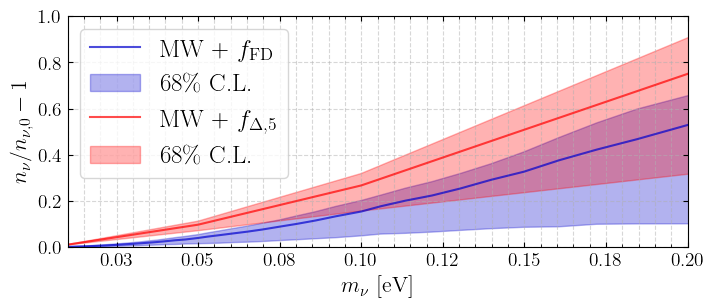

In [138]:
colors = [
    "mediumblue", 
    "red"
]
labels = [
    r"MW + $f_\mathrm{FD}$", 
    r"MW + $f_{\Delta,5}$"
]

fig_paths = [
    f"{fig_folder}/overdensity_band_{sim_name}_FD_vs_PF.pdf",
    f"{fig_folder}/overdensity_band_{sim_name}_FD_vs_PF.png"
]


SimPlot.overdensity_band(
    dens_FD=tot_dens_FD,
    dens_PF=tot_dens_PF_halos,
    m_arr_FD=nu_m_range,
    m_arr_PF=nu_m_picks,
    colors=colors,
    labels=labels,
    plot_xlims=(0.01, 0.2),
    plot_ylims=(0, 1),
    plot_log=False,
    fig_paths=fig_paths,
    args=Params())

### FD vs. different PFs

ValueError: x and y must have same first dimension, but have shapes (5,) and (2,)

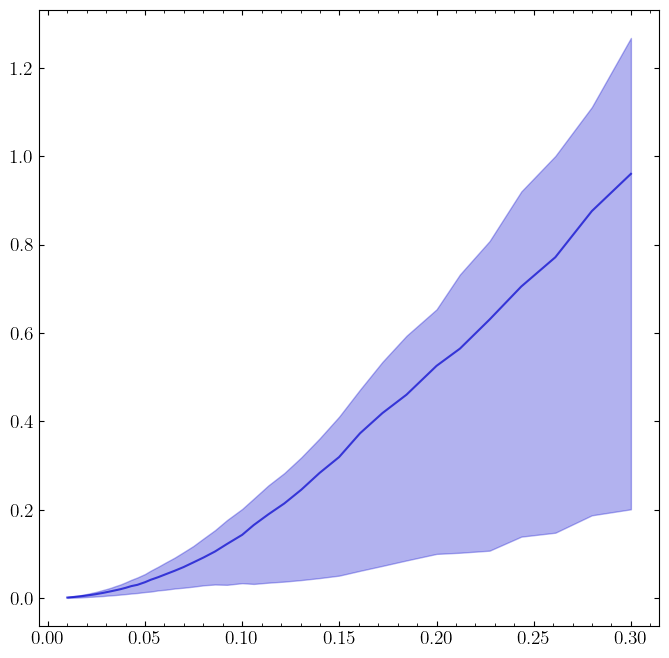

In [16]:
colors = [
    "mediumblue", 
    "red"
]
labels = [
    r"MW + $f_\mathrm{FD}$", 
    r"MW + $f_\Delta$"
]

for seed_i in range(10):
    fig_paths = [
        f"{fig_folder}/overdensity_band_{sim_name}_FD_vs_PF_seed{seed_i}.pdf",
        f"{fig_folder}/overdensity_band_{sim_name}_FD_vs_PF_seed{seed_i}.png"
    ]
    SimPlot.overdensity_band(
        dens_FD=tot_dens_FD,
        dens_PF=tot_dens_PF_seeds[:,seed_i,:],
        m_arr_FD=nu_m_range,
        m_arr_PF=nu_m_picks,
        colors=colors,
        labels=labels,
        plot_xlims=(0.01, 0.2),
        plot_ylims=(-0.1, 1),
        plot_log=False,
        fig_paths=fig_paths,
        args=Params())

### MW+PFs vs. PFs only

ic| tot_dens_FD_picks.shape: (26, 5)
ic| tot_dens_PF_halos.shape: (26, 5)


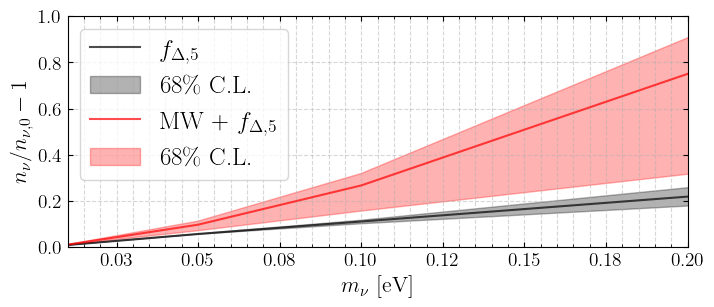

In [139]:
# Select the same 5 masses of PFs for the FD arrays (which have 50 masses)
diff = jnp.abs(nu_m_range - nu_m_picks[:, None])
m_picks_indices = jnp.argmin(diff, axis=-1)
# ic(nu_m_range[m_picks_indices])
tot_dens_FD_picks = tot_dens_FD[:, m_picks_indices]
ic(tot_dens_FD_picks.shape)
ic(tot_dens_PF_halos.shape)

colors = [
    "black", 
    "red"
]
labels = [
    r"$f_{\Delta,5}$", 
    r"MW + $f_{\Delta,5}$"
]

tot_dens_PF_only = (tot_dens_PF_halos-tot_dens_FD_picks)

fig_paths = [
    f"{fig_folder}/overdensity_band_{sim_name}_MW_and_LSSonly.pdf",
    f"{fig_folder}/overdensity_band_{sim_name}_MW_and_LSSonly.png"
]
SimPlot.overdensity_band(
    dens_FD=tot_dens_PF_only,
    dens_PF=tot_dens_PF_halos,
    m_arr_FD=nu_m_picks,
    m_arr_PF=nu_m_picks,
    colors=colors,
    labels=labels,
    plot_xlims=(0.01, 0.2),
    plot_ylims=(0, 1),
    plot_log=False,
    fig_paths=fig_paths,
    args=Params())

### MW+PFs vs. PFs only - ultimate uncertainties

ic| nu_m_range[m_picks_indices]: Array([0.01, 0.05, 0.1 , 0.2 , 0.3 ], dtype=float64)
ic| tot_dens_FD_picks.shape: (26, 5)
ic| tot_dens_PF_seeds.shape: (26, 10, 5)
ic| tot_dens_PF_only_seeds.shape: (26, 10, 5)


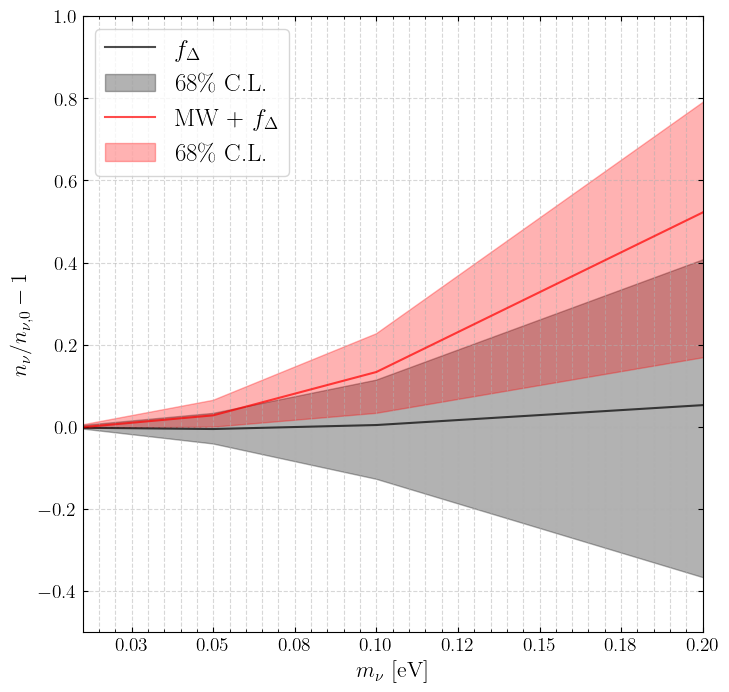

In [114]:
# Select the same 5 masses of PFs for the FD arrays (which have 50 masses)
diff = jnp.abs(nu_m_range - nu_m_picks[:, None])
m_picks_indices = jnp.argmin(diff, axis=-1)
ic(nu_m_range[m_picks_indices])
tot_dens_FD_picks = tot_dens_FD[:, m_picks_indices]
ic(tot_dens_FD_picks.shape)
# ic(tot_dens_PF_halos.shape)

colors = [
    "black", 
    "red"
]
labels = [
    r"$f_\Delta$", 
    r"MW + $f_\Delta$"
]


ic(tot_dens_PF_seeds.shape)

tot_dens_PF_only_seeds = (tot_dens_PF_seeds-tot_dens_FD_picks[:,None,:])
ic(tot_dens_PF_only_seeds.shape)

# """
fig_paths = [
    f"{fig_folder}/overdensity_band_{sim_name}_MW_and_LSSonly.pdf",
    f"{fig_folder}/overdensity_band_{sim_name}_MW_and_LSSonly.png"
]
SimPlot.overdensity_band(
    dens_FD=tot_dens_PF_only_seeds.reshape(-1, 5),
    dens_PF=tot_dens_PF_seeds.reshape(-1, 5),
    m_arr_FD=nu_m_picks,
    m_arr_PF=nu_m_picks,
    colors=colors,
    labels=labels,
    plot_xlims=(0.01, 0.2),
    plot_ylims=(-0.5, 1),
    plot_log=False,
    fig_paths=fig_paths,
    args=Params())
# """

### Including uncertainties from different realisations

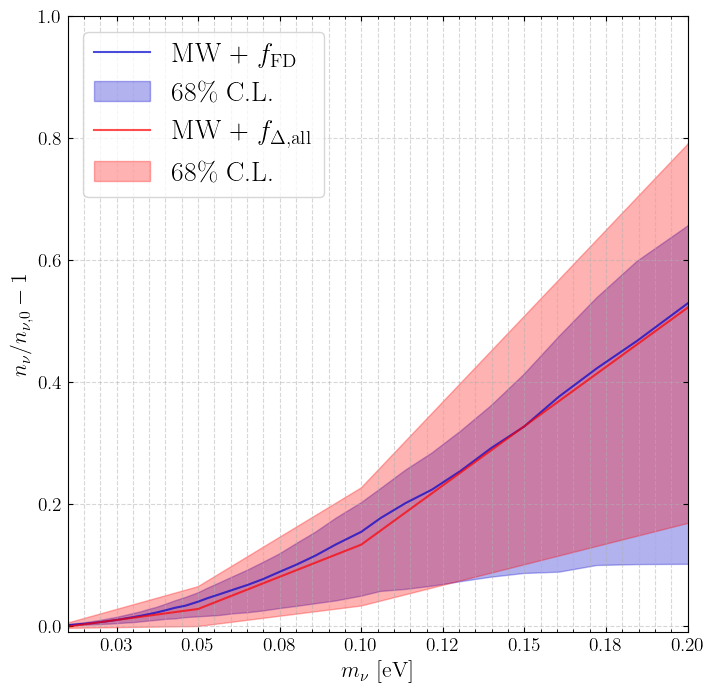

In [149]:
colors = [
    "mediumblue", 
    "red"
]
labels = [
    r"MW + $f_\mathrm{FD}$", 
    r"MW + $f_{\Delta,{\rm all}}$"
]

fig_paths = [
    f"{fig_folder}/overdensity_band_{sim_name}_FD_vs_PF_ALL.pdf",
    f"{fig_folder}/overdensity_band_{sim_name}_FD_vs_PF_ALL.png"
]

# for tot_dens_FD_halo_i, tot_dens_PF_seeds_halo_i in zip(tot_dens_FD, tot_dens_PF_seeds):

#     SimPlot.overdensity_band(
#         dens_FD=tot_dens_FD_halo_i[None,:],
#         # dens_PF=tot_dens_PF_seeds.reshape(-1, 5),
#         dens_PF=tot_dens_PF_seeds_halo_i,
#         m_arr_FD=nu_m_range,
#         m_arr_PF=nu_m_picks,
#         colors=colors,
#         labels=labels,
#         plot_xlims=(0.01, 0.2),
#         plot_ylims=(-0.1, 1.1),
#         plot_log=False,
#         fig_paths=fig_paths,
#         args=Params())

SimPlot.overdensity_band(
    dens_FD=tot_dens_FD,
    dens_PF=tot_dens_PF_seeds.reshape(-1, 5),
    m_arr_FD=nu_m_range,
    m_arr_PF=nu_m_picks,
    colors=colors,
    labels=labels,
    plot_xlims=(0.01, 0.2),
    plot_ylims=(-0.01, 1.0),
    plot_log=False,
    fig_paths=fig_paths,
    args=Params())

(26, 5)


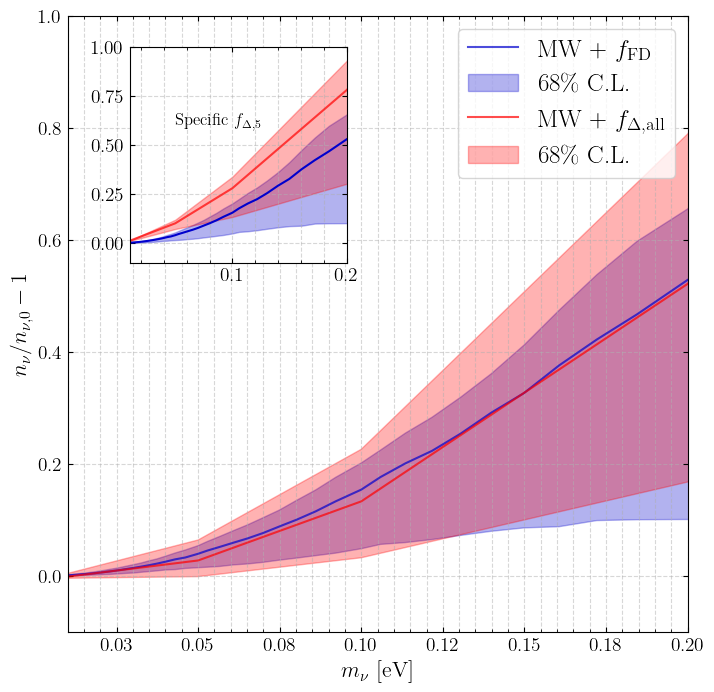

In [89]:
colors = [
    "mediumblue", 
    "red"
]
labels = [
    r"MW + $f_\mathrm{FD}$", 
    r"MW + $f_{\Delta,\mathrm{all}}$"
]

fig_paths = [
    f"{fig_folder}/overdensity_band_{sim_name}_FD_vs_PF_ALL.pdf",
    f"{fig_folder}/overdensity_band_{sim_name}_FD_vs_PF_ALL.png"
]

SimPlot.overdensity_band_inset(
    dens_FD=tot_dens_FD,
    dens_PF=tot_dens_PF_seeds.reshape(-1, 5),
    m_arr_FD=nu_m_range,
    m_arr_PF=nu_m_picks,
    colors=colors,
    labels=labels,
    plot_xlims=(0.01, 0.2),
    plot_ylims=(-0.1, 1),
    plot_log=False,
    fig_paths=fig_paths,
    inset_xlims=[0.01, 0.2], 
    inset_ylims=[-0.1, 1],
    inset_position=[0.1, 0.6], 
    inset_size=[0.35, 0.35],
    args=Params())

### MW+different PFs. vs. PFs only

In [13]:
diff = jnp.abs(nu_m_range - nu_m_picks[:, None])
m_picks_indices = jnp.argmin(diff, axis=-1)
ic(nu_m_range[m_picks_indices])
tot_dens_FD_picks = tot_dens_FD[:, m_picks_indices]
ic(tot_dens_FD_picks.shape)
ic(tot_dens_PF_halos.shape)

colors = [
    "black", 
    "red"
]
labels = [
    r"$f_\Delta$", 
    r"MW + $f_\Delta$"
]

# fig_paths = [
#     f"{fig_folder}/overdensity_band_{sim_name}_MW_and_LSSonly.pdf",
#     f"{fig_folder}/overdensity_band_{sim_name}_MW_and_LSSonly.png"
# ]
# tot_dens_PF_only = (tot_dens_PF_halos-tot_dens_FD_picks)


for seed_i in range(10)[::5]:
    fig_paths = [
        f"{fig_folder}/overdensity_band_{sim_name}_MW_and_LSSonly_seed{seed_i}.pdf",
        f"{fig_folder}/overdensity_band_{sim_name}_MW_and_LSSonly_seed{seed_i}.png"
    ]
    tot_dens_PF_only = (tot_dens_PF_seeds[:,seed_i,:]-tot_dens_FD_picks)
    print(tot_dens_PF_only.shape)
    # SimPlot.overdensity_band(
    #     dens_FD=tot_dens_PF_only,
    #     # dens_PF=tot_dens_PF_halos,
    #     dens_PF=tot_dens_PF_seeds[:,seed_i,:],
    #     m_arr_FD=nu_m_picks,
    #     m_arr_PF=nu_m_picks,
    #     colors=colors,
    #     labels=labels,
    #     plot_xlims=(0.01, 0.2),
    #     plot_ylims=(-0.1, 1),
    #     plot_log=False,
    #     fig_paths=fig_paths,
    #     args=Params())

ic| nu_m_range[m_picks_indices]: Array([0.01, 0.05, 0.1 , 0.2 , 0.3 ], dtype=float64)
ic| tot_dens_FD_picks.shape: (27, 5)
ic| tot_dens_PF_halos.shape: (27, 5)


(27, 5)
(27, 5)


## Monopole Evolution

In [ ]:
dens_zeds = jnp.load(f"{sim_folder}/total_densities_zeds.npy")
print(dens_zeds.shape)

fig = plt.figure()
fig.tight_layout()
ax = fig.add_subplot(111)

m_pick_ids = jnp.argmin(jnp.abs(nu_m_range[:, None] - nu_m_picks[:-1]), axis=0)
# print(m_pick_ids)
# print(nu_m_range[m_pick_ids])

z_axis = z_int_steps[jnp.arange(1,99,5)]
print(z_axis)
print(jnp.load(f"{sim_folder}/zeds_snaps.npy"))

violet_colors = [
    "hotpink", 
    "mediumvioletred", 
    "blueviolet",
    "rebeccapurple",
    # "pink",
]
labels = ["0.01 eV", "0.05 eV", "0.1 eV", "0.2 eV"]

for vcolor, label, m_pick_id in zip(violet_colors, labels, m_pick_ids):

    # Convert to overdensities
    etas = dens_zeds[...,m_pick_id] / (Params.N0 / Params.cm**-3)
    
    # For single halo, dens_zeds.shape = (zeds, masses)
    # ax.plot(z_axis, etas-1, color=vcolor, label=label)
    
    # For multiple halos, dens_zeds.shape = (halos, zeds, masses)
    # """
    # Compute median and percentile ranges
    etas_med = np.median(etas, axis=0)
    etas_16 = np.percentile(etas, q=16, axis=0)
    etas_84 = np.percentile(etas, q=84, axis=0)
    etas_2p5 = np.percentile(etas, q=2.5, axis=0)
    etas_97p5 = np.percentile(etas, q=97.5, axis=0)

    # Plot median of halo batch
    ax.plot(
        z_axis, etas_med-1, color=vcolor, label=label, alpha=0.7)
    
    # Plot 84% C.L. band
    # ax.fill_between(
    #     z_axis, etas_16-1, etas_84-1, 
    #     color=vcolor, alpha=0.3, label=r"16 $-$ 84 % C.L.")
    # """
    
ax.set_xlabel("z", fontsize=16)
# ax.set_xscale('log')

ax.set_ylabel(r"$n_{\nu} / n_{\nu, 0}$", fontsize=16)
ax.set_yscale('log')
ax.set_ylim(1e-3,1e1)

ax.legend()

# 1+10^X styled y-axis labels, to easily see order of overdensities
ax.yaxis.set_major_formatter(ticker.FuncFormatter(Utils.y_fmt))


## Dipole perturbation

### Elbers et al. method

In [ ]:
colors = [
    "mediumblue", 
    "red"
]
labels = [
    r"MW + $f_\mathrm{FD}$", 
    r"MW + $f_\Delta$"
]

fig_paths = [
    f"{fig_folder}/bulk_velocity_band_{sim_name}.pdf",
    f"{fig_folder}/bulk_velocity_band_{sim_name}.png"
]

halo_limit = 2
Deltas_halos = jnp.reshape(
    jnp.load(f"{sim_folder}/Deltas_halos.npy")[:halo_limit,...], 
    (halo_limit, len(nu_m_picks), -1))
SimPlot.bulk_velocity_band_Guillermo(
    sim_dir=sim_folder, 
    halo_num=halo_limit, 
    m_arr=nu_m_picks, 
    pix_sr=4*Params.Pi,
    Deltas=Deltas_halos, 
    colors=colors, 
    labels=labels, 
    plot_xlims=None, 
    # plot_ylims=None, 
    plot_ylims=(None,520), 
    fig_paths=fig_paths, 
    args=Params())

### "Simple"

In [ ]:
# v_unit = (Params.kpc/Params.s)/(Params.m/Params.s)
# init_vels = jnp.load("sim_output/Dopri5_1k/initial_velocities.npy")*v_unit
# print(init_vels.shape, init_vels[0,0,3])
# init_mags = jnp.linalg.norm(init_vels, axis=-1)
# x_vels = init_vels[...,0]
# print(jnp.sum(init_vels))


def bulk_velocity_simple(args):

    # Velocities
    v_unit = (Params.kpc/Params.s)/(Params.km/Params.s)
    vels = jnp.load(f"{sim_folder}/vectors_halo1.npy")[..., 3:6]
    # print(vels.shape)
    v_init = vels[..., 0, :]
    v_back = vels[...,-1, :]
    # print(v_init.shape)
    v_mags = jnp.linalg.norm(vels, axis=-1)

    # Momenta
    p_arr, _ = Physics.velocities_to_momenta_all_sky(vels, nu_m_picks, args)
    p_init = p_arr[..., 0]
    p_back = p_arr[...,-1]
    # print(p_arr.shape)
    # print(p_init.shape)

    # Sorting arrays in ascending order (for trap integral)
    ind = p_init.argsort(axis=-1)
    # print(v_init[..., 0][None, ...].shape)
    p_init_sort = jnp.take_along_axis(p_init, ind, axis=-1)
    p_back_sort = jnp.take_along_axis(p_back, ind, axis=-1)
    v_x_sort = jnp.take_along_axis(v_init[..., 0][None, ...], ind, axis=-1)
    v_y_sort = jnp.take_along_axis(v_init[..., 1][None, ...], ind, axis=-1)
    v_z_sort = jnp.take_along_axis(v_init[..., 2][None, ...], ind, axis=-1)
    # print(v_z_sort.shape)

    # Checking if number density is ok
    # n_nus = Physics.number_density(p_init, p_back, simdata.pix_sr, args)*(1/args.cm**3)
    n_nus = Physics.number_density(p_init_sort, p_back_sort, simdata.pix_sr, args)*(1/args.cm**3)
    print("n_nus:", jnp.sum(n_nus, axis=-1)/args.cm**-3)


    FD_vals = Physics.Fermi_Dirac(p_back_sort, args)
    print(FD_vals.shape)

    v_sort = jnp.stack((v_x_sort, v_y_sort, v_z_sort), axis=3)*v_unit
    print(v_sort.shape)

    weighted_vels = FD_vals[..., None]*v_sort

    summed_vels_xyz = jnp.sum(weighted_vels, axis=2)
    print(summed_vels_xyz.shape)

    v_bulk_vecs = jnp.sum(summed_vels_xyz, axis=1)
    print(v_bulk_vecs)

    norm = jnp.sum(FD_vals)

    v_bulk_mags = jnp.linalg.norm(v_bulk_vecs, axis=-1) / norm
    print(v_bulk_mags)


bulk_velocity_simple(Params())

### New

In [ ]:
def bulk_velocity_new(args):

    # Velocities
    vels = jnp.load(f"{sim_folder}/vectors_halo1.npy")[..., 3:6]
    v_mags = jnp.linalg.norm(vels, axis=-1)
    v_init = v_mags[..., 0]
    v_back = v_mags[...,-1]
    # print(vels.shape)
    # print(v_init.shape)

    # Momenta
    p_arr, _ = Physics.velocities_to_momenta_all_sky(vels, nu_m_picks, args)
    p_init = p_arr[..., 0]
    p_back = p_arr[...,-1]
    # print(p_arr.shape)
    # print(p_init.shape)

    n_nus = Physics.number_density(p_init, p_back, simdata.pix_sr, args)*(1/args.cm**3)
    # print(n_nus.shape)

    # note: trapz integral method needs sorted (ascending) "x-axis" array.
    ind = p_init.argsort(axis=-1)
    p_init_sort = jnp.take_along_axis(p_init, ind, axis=-1)
    p_back_sort = jnp.take_along_axis(p_back, ind, axis=-1)
    v_init_sort = jnp.take_along_axis(v_init[None, ...], ind, axis=-1)
    v_back_sort = jnp.take_along_axis(v_back[None, ...], ind, axis=-1)

    # Deviation of phase-space today from Fermi-Dirac distribution
    f_diff = jnp.abs(Physics.Fermi_Dirac(p_back_sort, args) - Physics.Fermi_Dirac(p_init_sort, args))
    # print(f_diff.shape)

    y = p_init_sort**4 * f_diff  # dlog integrand
    x = p_init_sort
    integral = trap(y, jnp.log(x), axis=-1)

    # left hand side of equation
    rho_P_v = args.g_nu / (2*args.Pi**2) * integral
    print(rho_P_v.shape)

    # energy density
    # rho = nu_m_picks[:, None] * n_nus
    rho = nu_m_picks[:, None] * args.N0/(1/args.cm**3)
    print(rho.shape)

    # bulk velocity? dipole perturbation?
    v_bulk = rho_P_v / rho

    return v_bulk


v_unit = (Params.km/Params.s)
v_bulk = bulk_velocity_new(Params())
v_mean = jnp.mean(v_bulk, axis=-1)/v_unit
print(v_mean)

plt.plot(nu_m_picks, v_mean)
plt.title(f"Dipole perturbation")
plt.xlabel(fr"$m_\nu$")
plt.ylabel(fr"$v_\nu$")
plt.show(); plt.close()

### Old

In [ ]:
# halo_limit = 2
# SimPlot.bulk_velocity_band(
#     sim_dir=sim_folder, 
#     halo_num=halo_limit, 
#     m_arr=nu_m_picks, 
#     pix_sr=simdata.pix_sr,
#     Deltas=jnp.load(f"{sim_folder}/Deltas_halos.npy")[:halo_limit,...], 
#     colors=colors, 
#     labels=labels, 
#     plot_xlims=None, 
#     plot_ylims=None, 
#     # plot_ylims=(0,100), 
#     fig_dir=fig_folder, 
#     args=Params())

In [ ]:
def dipole_perturbation(nu_vel_skymap):

    cl, alm = hp.sphtfunc.anafast(np.array(nu_vel_skymap), alm=True, lmax=1)

    return cl, alm


v_unit = (Params.kpc/Params.s)/(Params.km/Params.s)
vels = jnp.load(f"{sim_folder}/vectors_halo1.npy")[..., 3:6]#*v_unit
v_mags = jnp.linalg.norm(vels, axis=-1)
v_init = v_mags[..., 0]
v_back = v_mags[...,-1]
print(vels.shape)
print(v_init.shape)

# v_avg = jnp.mean(v_mags, axis=-1)
# print(v_avg.min(), v_avg.max())


# Compute phase-space weights
p_arr, _ = Physics.velocities_to_momenta_all_sky(vels, nu_m_picks, Params())
p_init = p_arr[..., 0]
p_back = p_arr[...,-1]
# print(p_arr.shape)
print(p_init.shape)

# note: trapz integral method needs sorted (ascending) "x-axis" array.
ind = p_init.argsort(axis=-1)
p_init_sort = jnp.take_along_axis(p_init, ind, axis=-1)
p_back_sort = jnp.take_along_axis(p_back, ind, axis=-1)

v_init_sort = jnp.take_along_axis(v_init[None, ...], ind, axis=-1)
v_back_sort = jnp.take_along_axis(v_back[None, ...], ind, axis=-1)

FD_arr = Physics.Fermi_Dirac(p_back_sort, Params())
# print(FD_arr.shape)

y = (v_init_sort[None,...]*v_unit)**2 * FD_arr  # dlog integrand
x = v_back_sort[None,...]*v_unit
v_raw = trap(y, jnp.log(x), axis=-1)

"""
v_pre = simdata.pix_sr * Params.g_nu/((2*Params.Pi)**3)
v_avg = v_pre * v_raw
print(v_avg.shape)

#! need to subtract monopole.
# from where do I get monopole? from no_gravity sim?

mi = 0
print(v_avg[mi].min())
print(v_avg[mi].max())

# monopole = 

# monopole_val, dipole_vec = hp.pixelfunc.fit_dipole(np.array(nu_vel_skymap[mi]))
# print(monopole_val)
# print(dipole_vec)
"""


"""
print((nu_vel_skymap-v_norm).min())

cl, alm = dipole_perturbation(nu_vel_skymap-v_norm)
print(cl.shape, alm.shape)

# dipole_unit = Params.km/Params.s
dipole_unit = 1
dipole_magnitude = jnp.linalg.norm(jnp.real(alm))
print("Dipole magnitude:", dipole_magnitude/dipole_unit)
"""

## CNB anisotropy x DM line-of-sight skymaps

In [ ]:
for halo_i, pix_dens in zip(halo_nums[20:26], pix_dens_FD[20:26]):

    ic(halo_i)

    # Load associated origID of chosen halo
    halo_indices = jnp.load(
        f"{sim_folder}/halo_batch_0.6-2.0x1e+12.0_Msun_indices.npy")
    haloID = halo_indices[halo_i-1]

    DM_pos_grid = jnp.load(
        f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy")

    fig_paths = [
        f"{fig_folder}/skymaps_CNBxDM_{sim_name}.pdf",
        f"{fig_folder}/skymaps_CNBxDM_{sim_name}.png",
    ]

    # Choose which neutrino mass to plot
    m_val = 0.1
    m_idx = jnp.abs(nu_m_picks - m_val).argmin()
    CNB_dens_1mass = pix_dens[m_idx, :]

    print(CNB_dens_1mass.shape)

    CNB_skymap, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
        nu_mass=m_val, 
        CNB_dens=CNB_dens_1mass, 
        DM_halo_pos=DM_pos_grid, 
        init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
        fig_paths=fig_paths,
        args=Params())

## Cross-correlation spectra

### Number density & DM line-of-sight

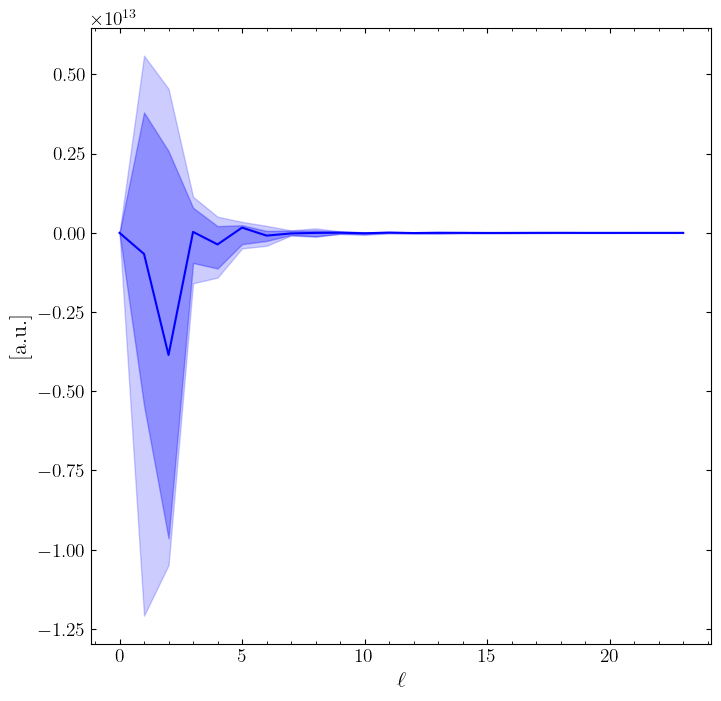

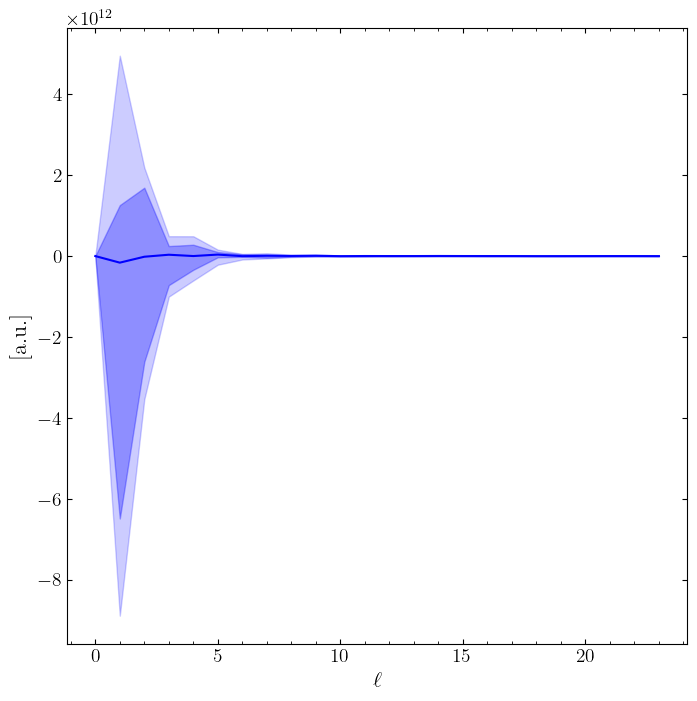

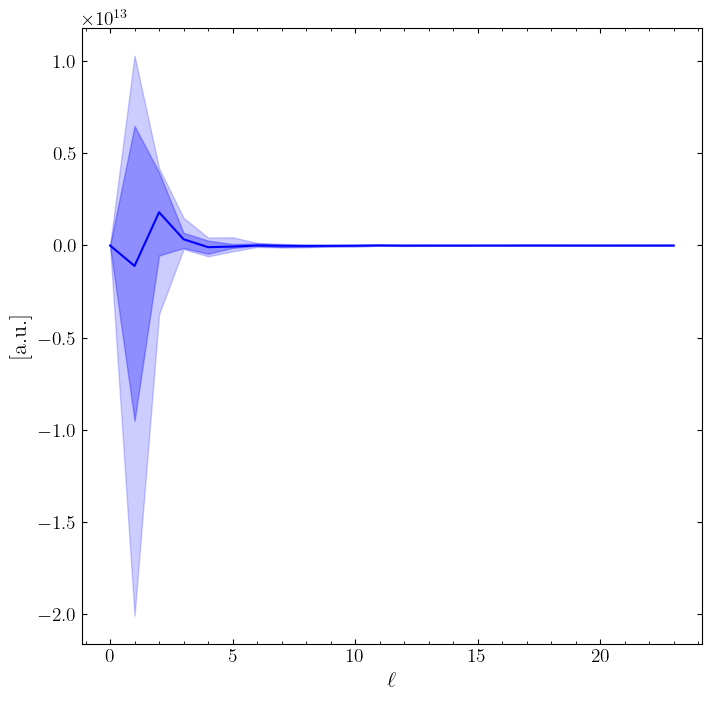

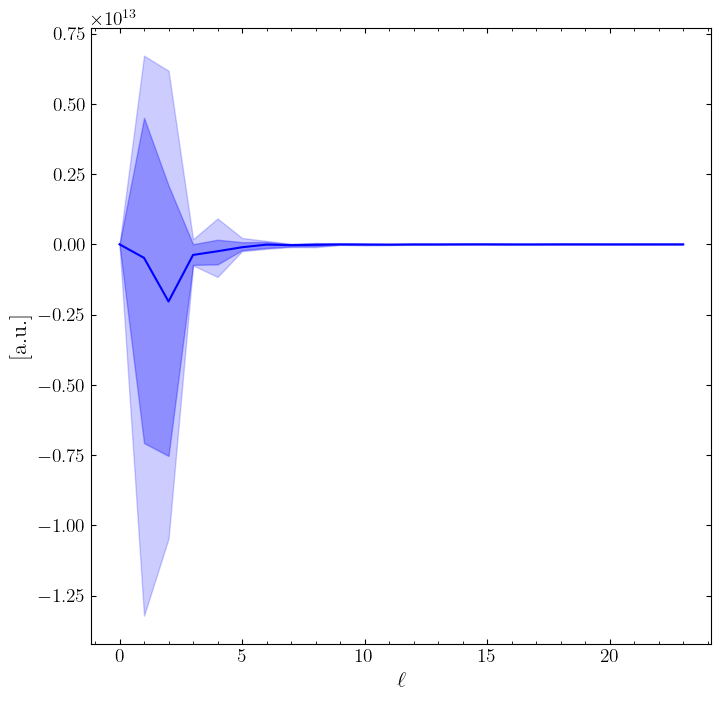

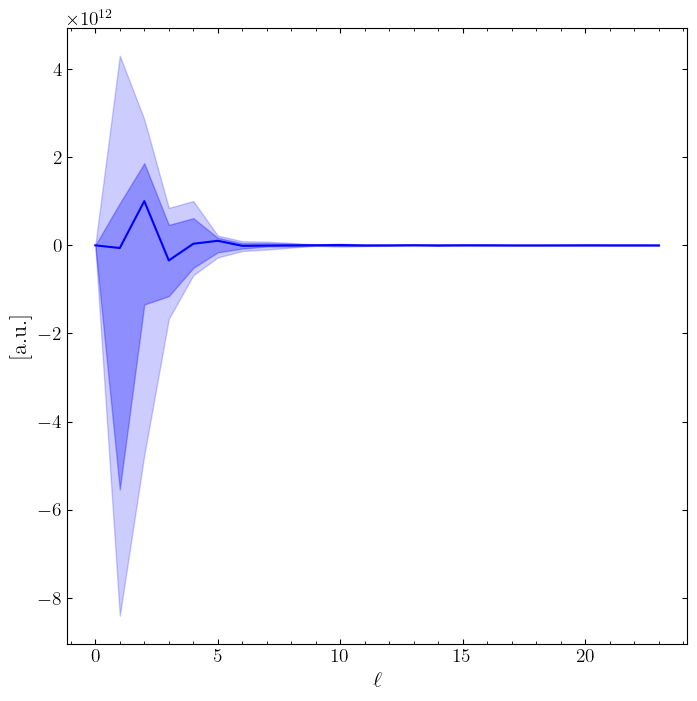

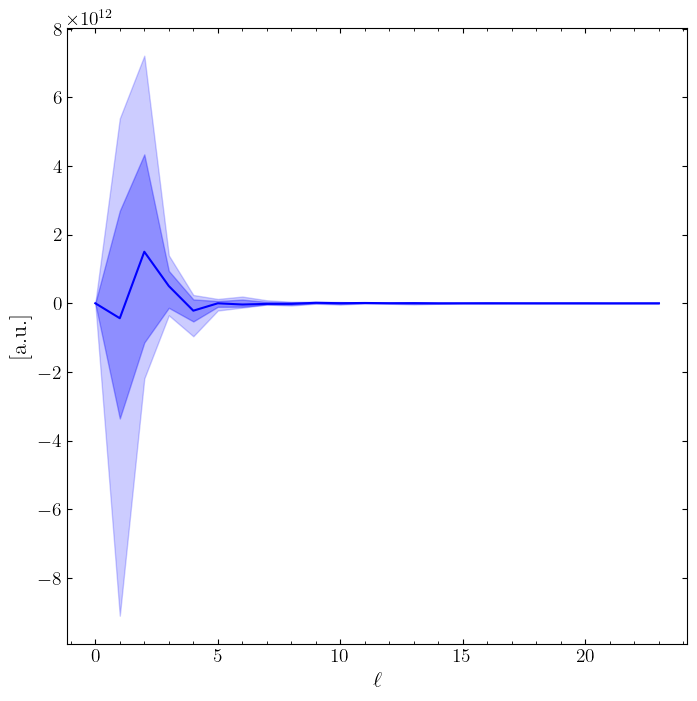

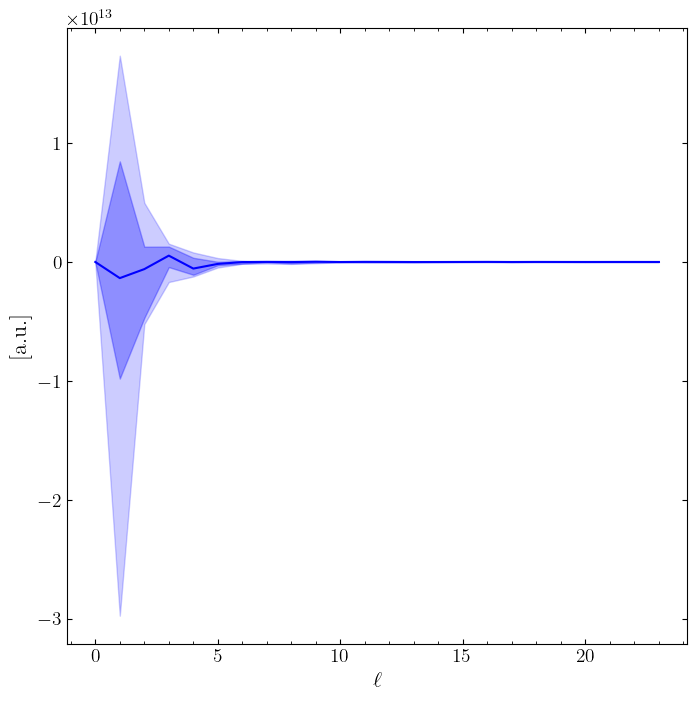

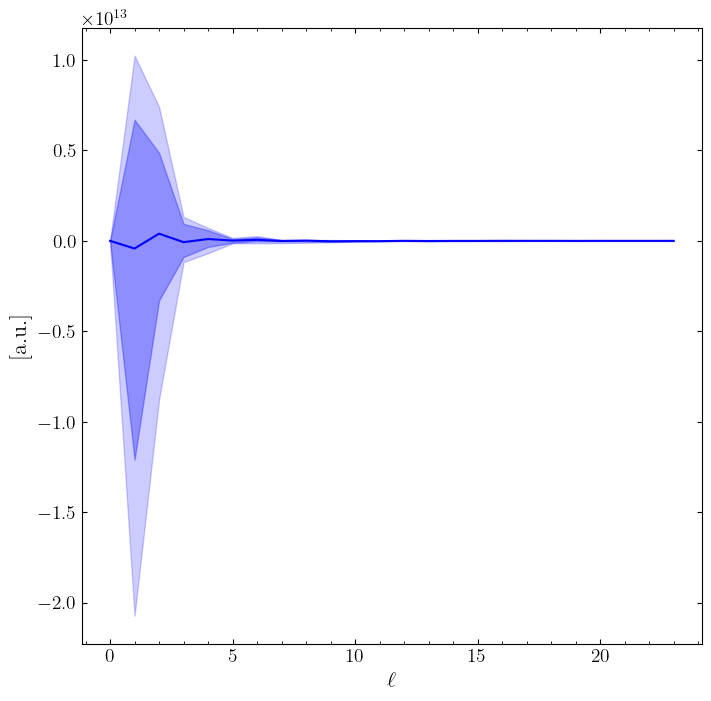

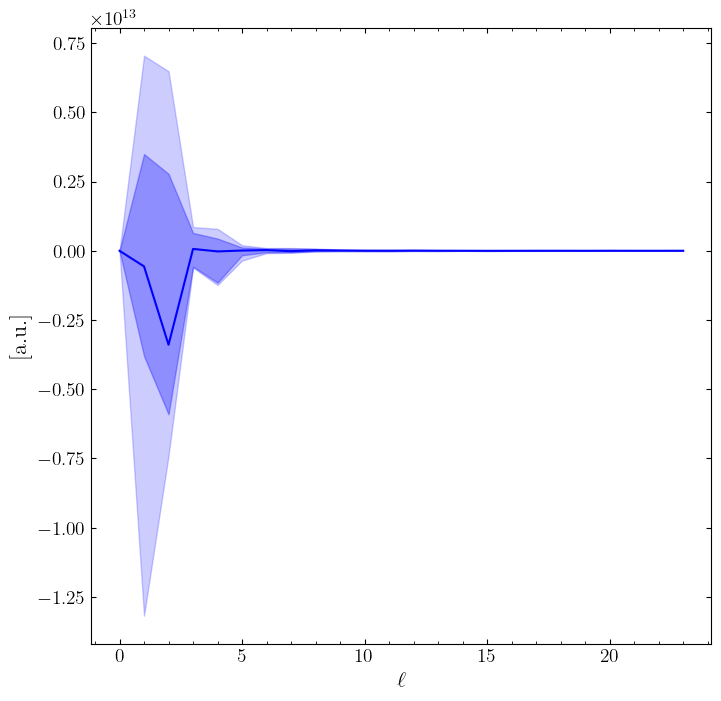

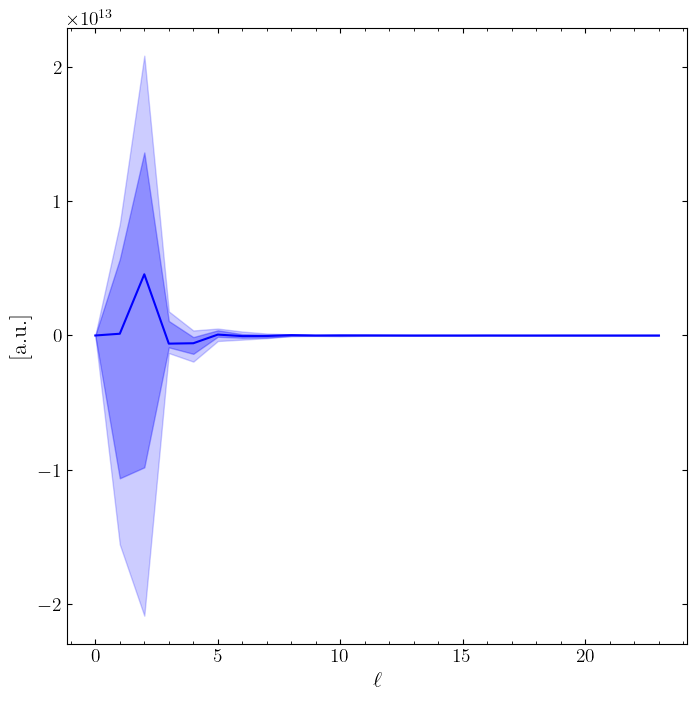

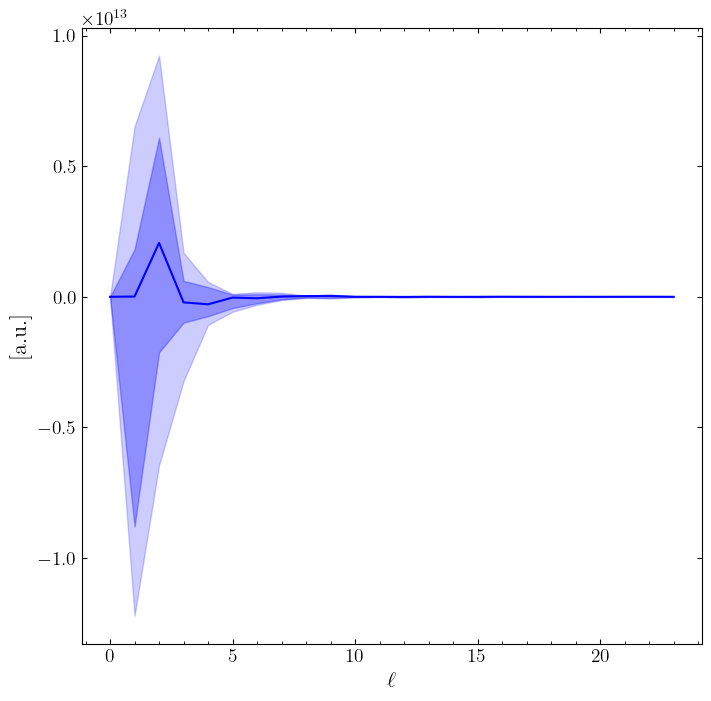

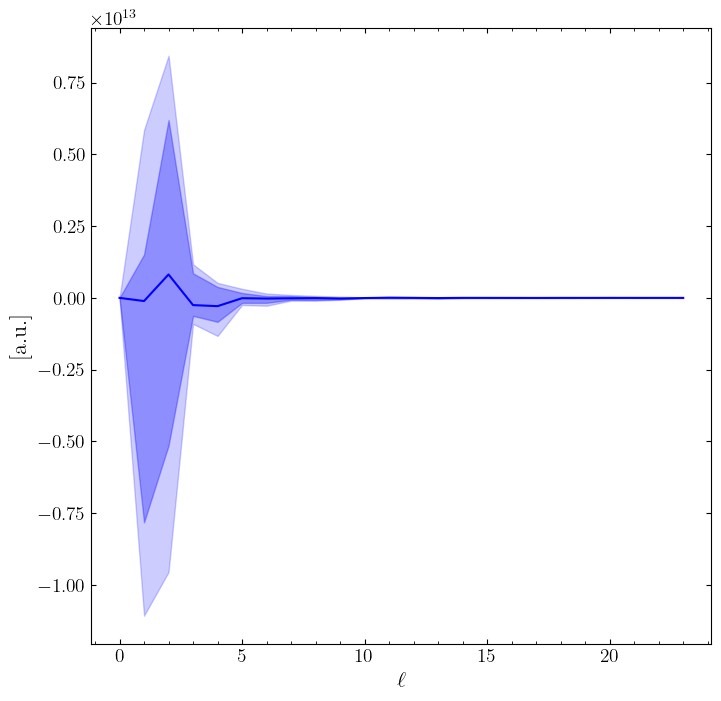

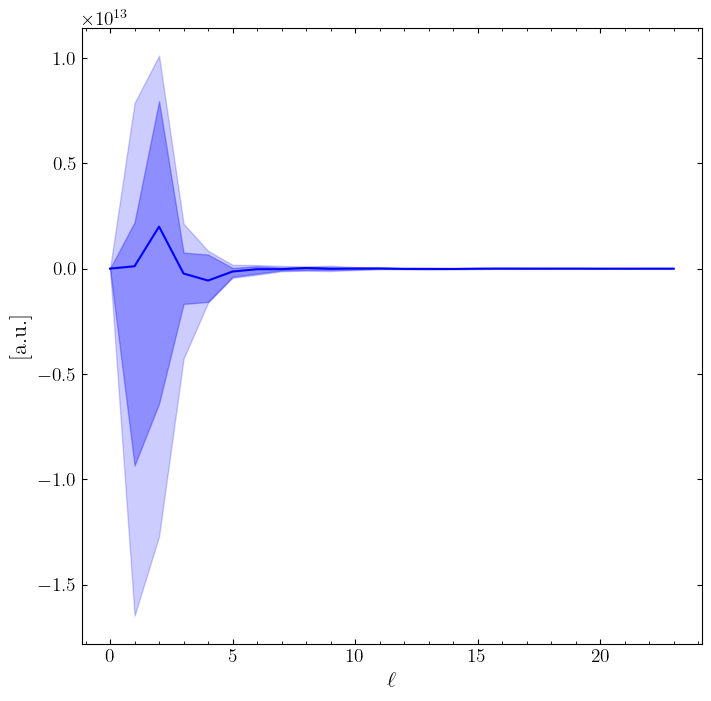

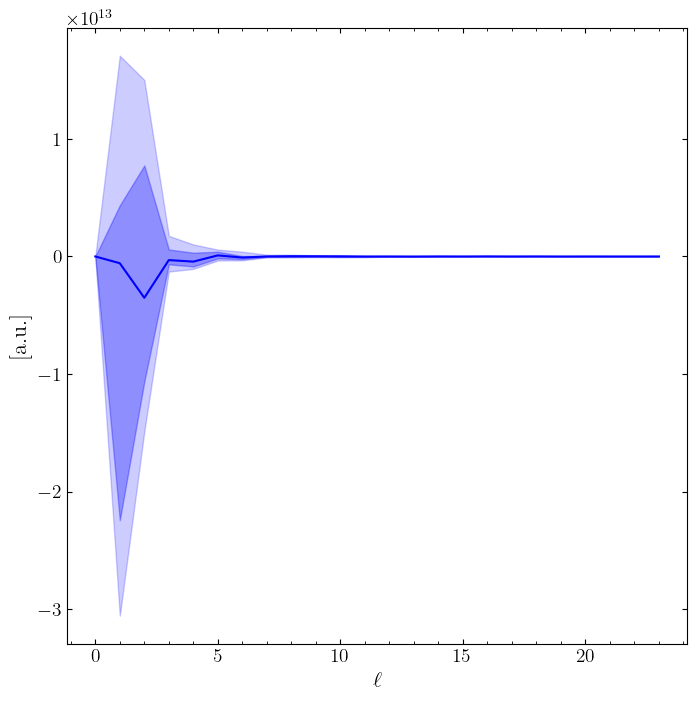

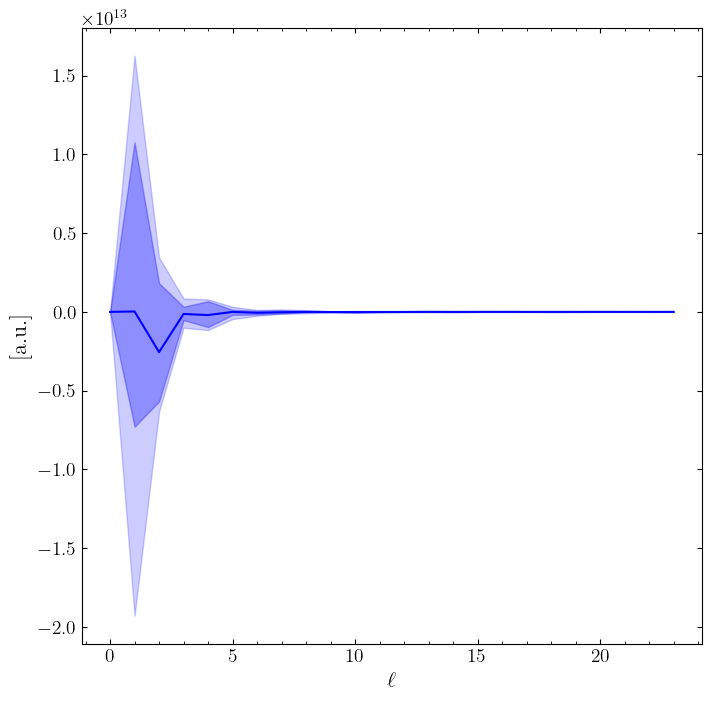

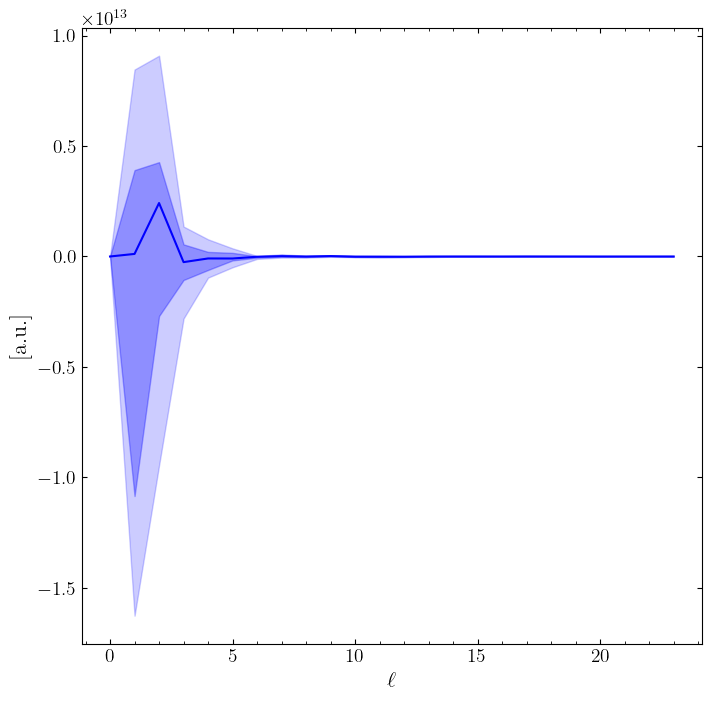

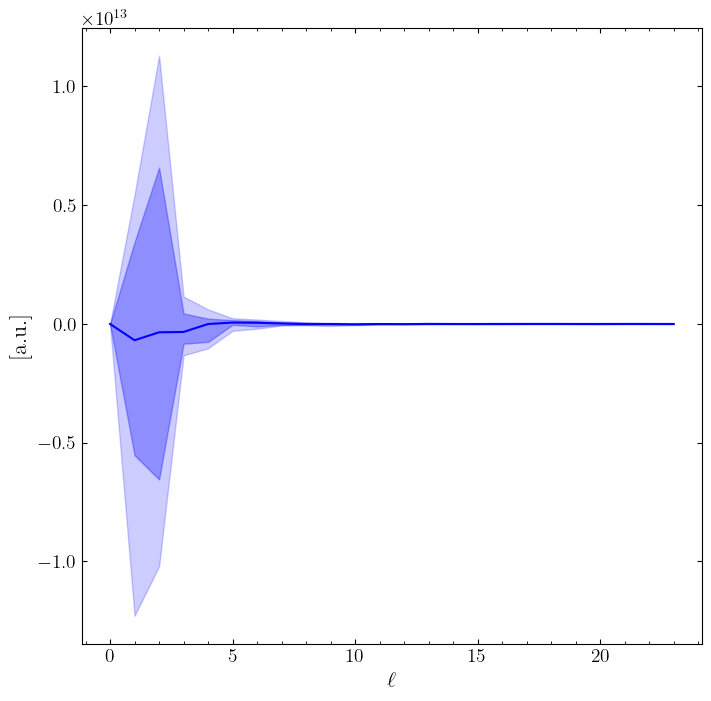

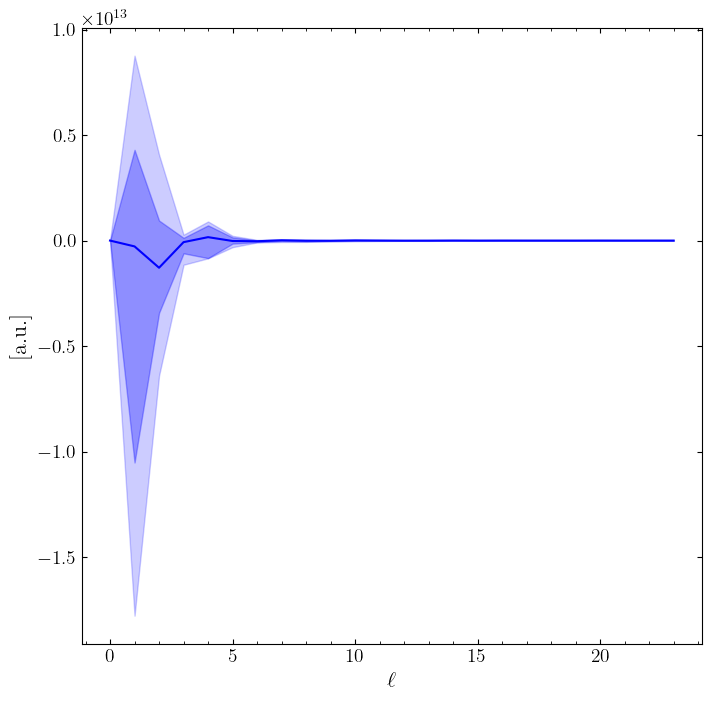

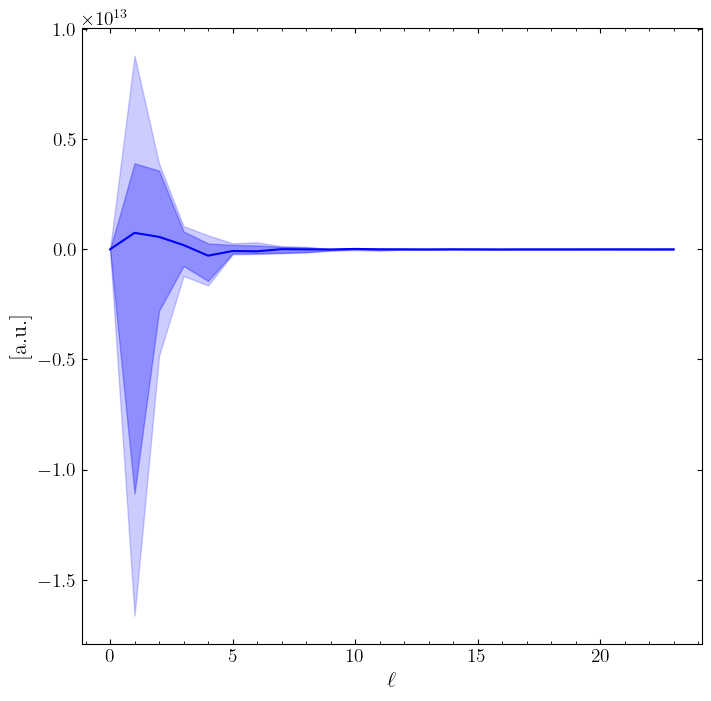

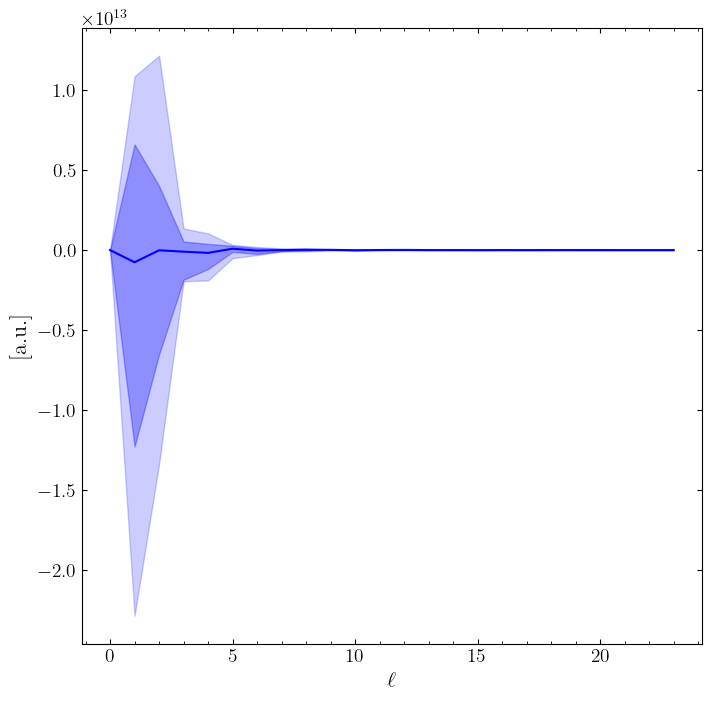

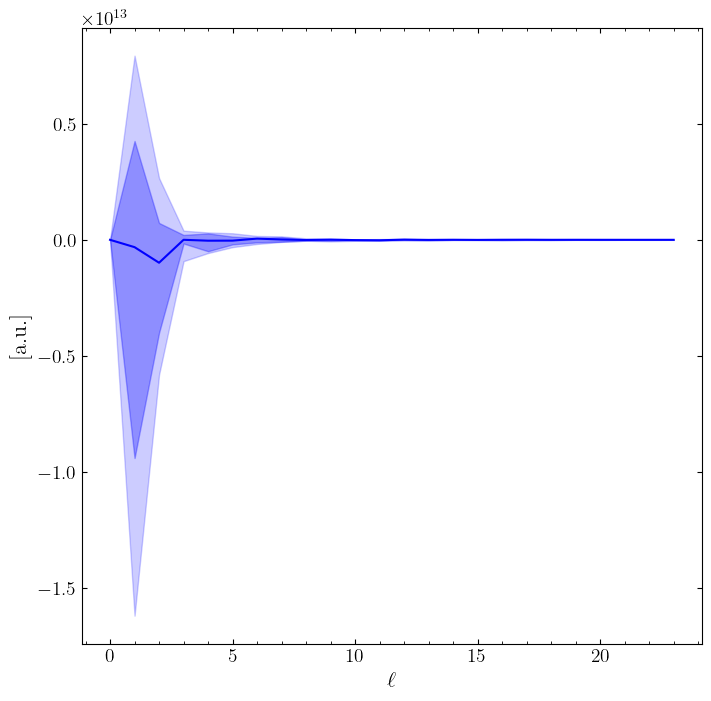

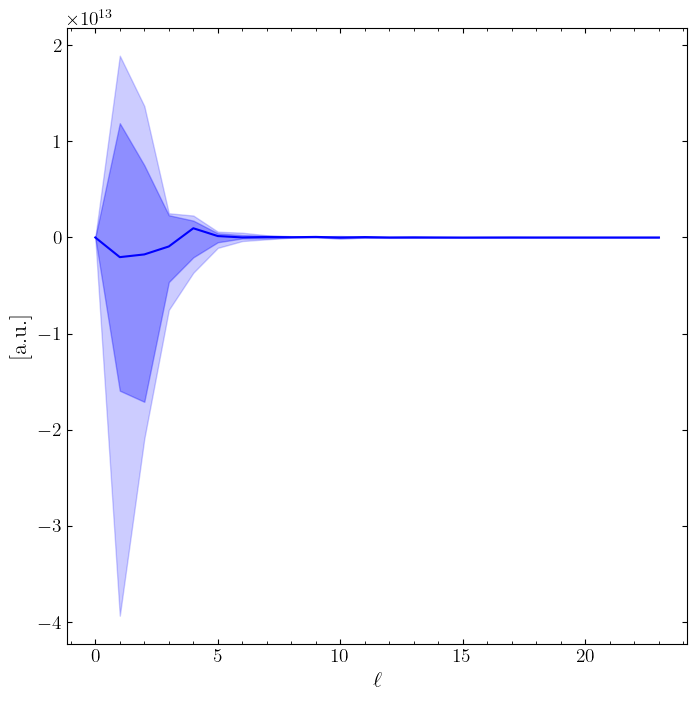

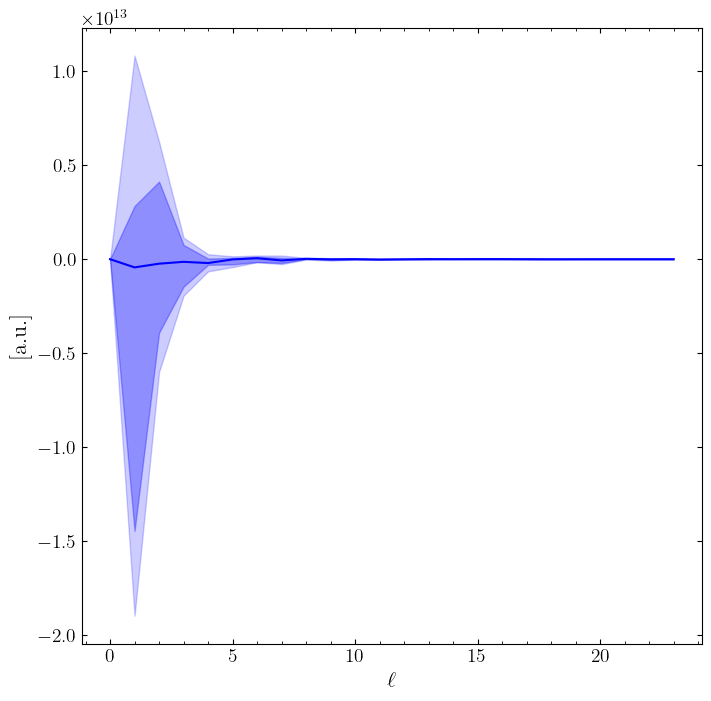

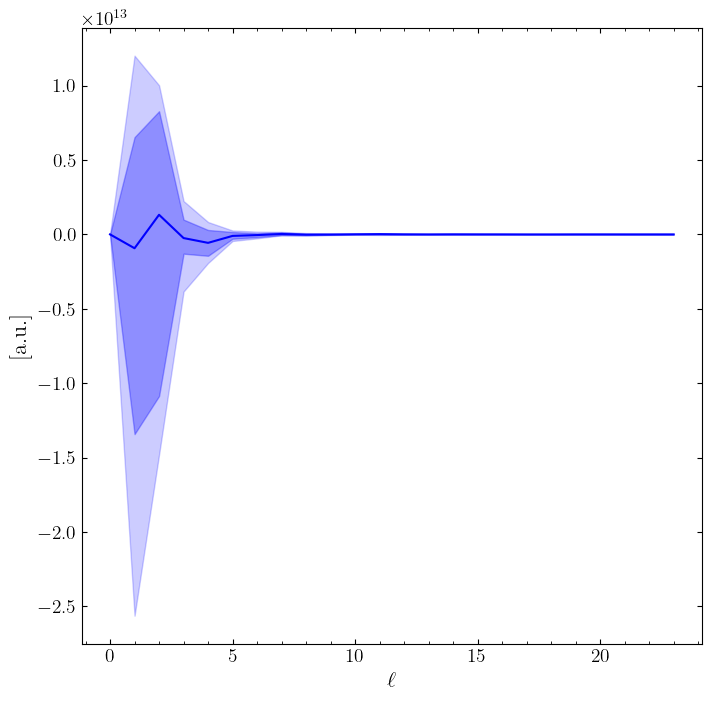

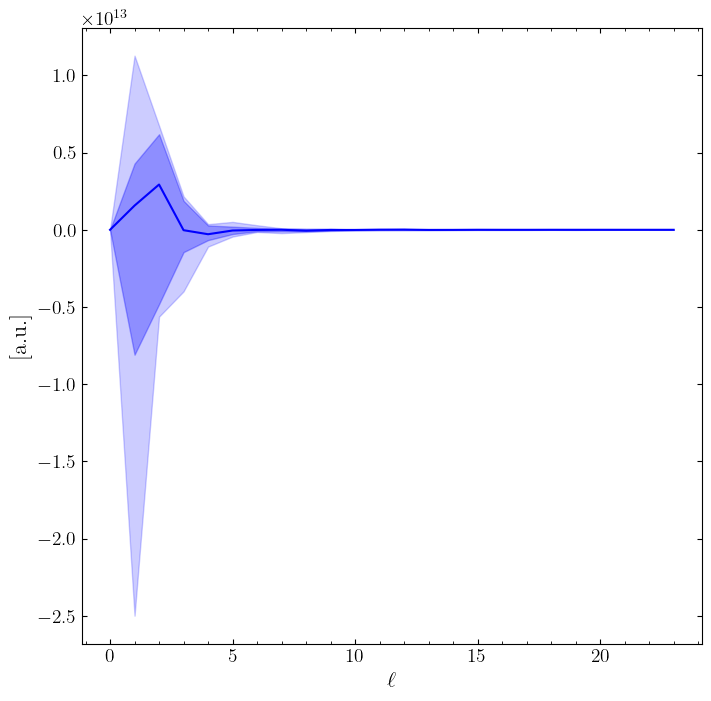

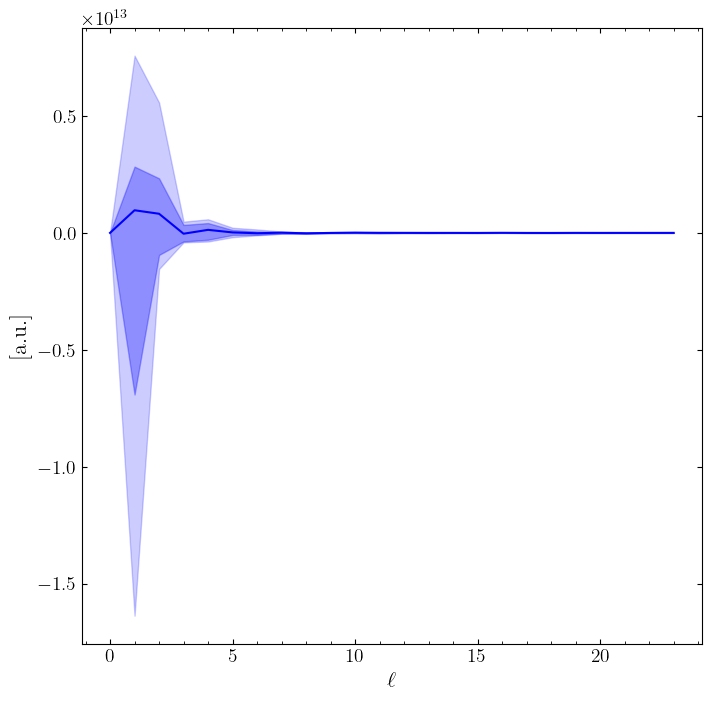

In [132]:
fig_paths = [
    f"{fig_folder}/skymaps_CNBxDM_{sim_name}.pdf",
    f"{fig_folder}/skymaps_CNBxDM_{sim_name}.png",
]

for halo_i, pix_dens in zip(halo_nums, pix_dens_FD):

    cross_spectra_l = []
    for seed_val in np.arange(10):

        # Load associated origID of chosen halo, then select DM grid
        halo_indices = np.load(
            f"{sim_folder}/halo_batch_0.6-2.0x1e+12.0_Msun_indices.npy")
        haloID = halo_indices[halo_i-1]
        DM_pos_grid = np.load(
            f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy")
        init_cell = np.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy")

        # Choose which neutrino mass
        m_val = 0.1
        m_idx = np.abs(nu_m_picks - m_val).argmin()
        CNB_dens = pix_dens[m_idx, :]
        # print(CNB_dens.shape)

        CNB_skymap, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
            nu_mass=m_val, 
            CNB_dens=CNB_dens, 
            DM_halo_pos=DM_pos_grid, 
            init_xyz=init_cell, 
            fig_paths=fig_paths,
            args=Params(),
            plot=False)
        
        # Get primordial temperature fluctuations at z=4 and z=0 (only need latter)
        Deltas_z4_avg, Deltas_z0_avg = SimPlot.temp_deltas_skymaps_qavg(
            m_Cl=m_val,
            # seed=Primordial.seed, 
            seed=seed_val, 
            Nside=simdata.Nside,
            z4_val=simdata.z4_sim_val,
            Cl_dir=Cl_folder, 
            fig_paths=fig_paths,
            args=Params,
            plot=False)

        # Compute cross-correlation spectrum of n_nu and DM maps.
        cross_cl = hp.sphtfunc.anafast(
            np.asarray(Deltas_z0_avg), np.asarray(DM_halo_skymap))
        ell = np.arange(len(cross_cl))
        cross_power_spectrum = ell*(ell+1)*cross_cl/(2*Params.Pi)*Primordial.Cl_scaling
        cross_spectra_l.append(cross_power_spectrum)


    fig = plt.figure()
    fig.tight_layout()
    ax = fig.add_subplot(111)

    cross_spectra = np.array(cross_spectra_l)
    cross_median = np.median(cross_spectra, axis=0)
    cross_perc2p5 = np.percentile(cross_spectra, q=2.5, axis=0)
    cross_perc97p5 = np.percentile(cross_spectra, q=97.5, axis=0)
    cross_perc16 = np.percentile(cross_spectra, q=16, axis=0)
    cross_perc84 = np.percentile(cross_spectra, q=84, axis=0)

    ax.plot(
        ell, cross_median, color='blue',)
        # label='Cross spectra median')
    ax.fill_between(
        ell, cross_perc2p5, cross_perc97p5, 
        color='blue', alpha=0.2,)
        # label='2.5-97.5 % C.L.')
    ax.fill_between(
        ell, cross_perc16, cross_perc84, 
        color='blue', alpha=0.3,) 
        # label='16-84 % C.L.')
    ax.set_xlabel("$\ell$")
    ax.set_ylabel("[a.u.]")

    plt.show(); plt.close()

### Primordial anisotropies & DM line-of-sight

In [ ]:
fig_paths = [
    f"{fig_folder}/skymaps_CNBxDM_{sim_name}.pdf",
    f"{fig_folder}/skymaps_CNBxDM_{sim_name}.png",
]

cross_spectra_l = []
for halo_i, pix_dens in zip(halo_nums, pix_dens_FD):

    # Load associated origID of chosen halo, then select DM grid
    halo_indices = np.load(
        f"{sim_folder}/halo_batch_0.6-2.0x1e+12.0_Msun_indices.npy")
    haloID = halo_indices[halo_i-1]
    DM_pos_grid = np.load(
        f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy")
    init_cell = np.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy")

    # Choose which neutrino mass
    m_val = 0.1
    m_idx = np.abs(nu_m_picks - m_val).argmin()
    CNB_dens = pix_dens[m_idx, :]
    # print(CNB_dens.shape)

    CNB_skymap, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
        nu_mass=m_val, 
        CNB_dens=CNB_dens, 
        DM_halo_pos=DM_pos_grid, 
        init_xyz=init_cell, 
        fig_paths=fig_paths,
        args=Params(),
        plot=False)

    # Compute cross-correlation spectrum of n_nu and DM maps.
    cross_cl = hp.sphtfunc.anafast(
        np.asarray(CNB_skymap), np.asarray(DM_halo_skymap))
    ell = np.arange(len(cross_cl))
    cross_power_spectrum = ell*(ell+1)*cross_cl/(2*Params.Pi)*Primordial.Cl_scaling
    cross_spectra_l.append(cross_power_spectrum)


fig = plt.figure()
fig.tight_layout()
ax = fig.add_subplot(111)

cross_spectra = np.array(cross_spectra_l)
cross_median = np.median(cross_spectra, axis=0)
cross_perc2p5 = np.percentile(cross_spectra, q=2.5, axis=0)
cross_perc97p5 = np.percentile(cross_spectra, q=97.5, axis=0)
cross_perc16 = np.percentile(cross_spectra, q=16, axis=0)
cross_perc84 = np.percentile(cross_spectra, q=84, axis=0)

ax.plot(
    ell, cross_median, color='blue',)
    # label='Cross spectra median')
ax.fill_between(
    ell, cross_perc2p5, cross_perc97p5, 
    color='blue', alpha=0.2,)
    # label='2.5-97.5 % C.L.')
ax.fill_between(
    ell, cross_perc16, cross_perc84, 
    color='blue', alpha=0.3,) 
    # label='16-84 % C.L.')
ax.set_xlabel("$\ell$")
ax.set_ylabel("[a.u.]")

plt.show(); plt.close()

## Phase-space distributions today

In [ ]:
SimPlot.phase_space_2x2_FD_vs_PF(
    sim_dir=sim_folder, 
    m_picks=nu_m_picks, 
    halo_num=8, 
    fig_dir=fig_folder,
    args=Params())

#note TODO: 
# - add escape momentum vertical band

In [ ]:
SimPlot.momentum_distributions_2x2_FD_vs_PF(
    sim_dir=sim_folder, 
    m_picks=nu_m_picks, 
    halo_num=5, 
    fig_dir=fig_folder,
    args=Params())

## Temperature fluctuation skymaps from Cl

### Specific q-momentum

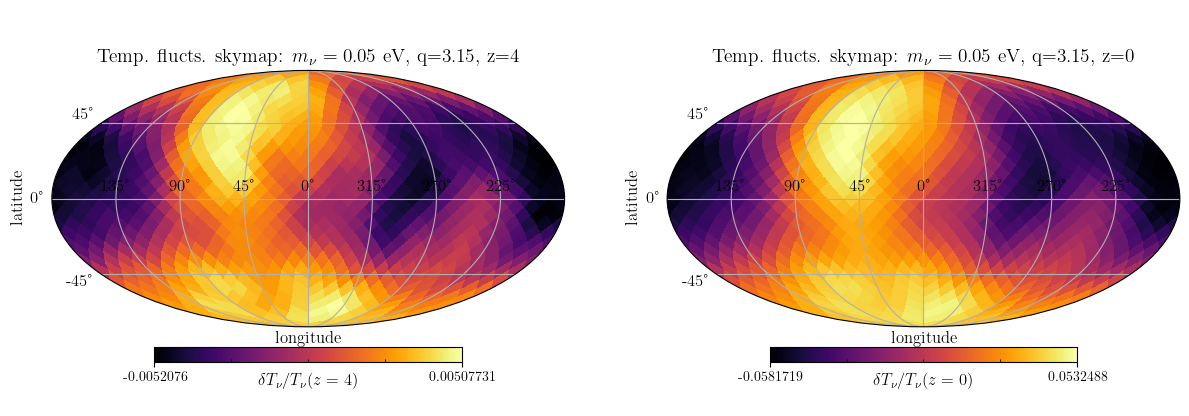

-0.0015337925802586042 -0.01647748620623357


In [3]:
fig_paths = [
    f"{fig_folder}/temperature_fluctuations_skymaps_q_select.pdf",
    f"{fig_folder}/temperature_fluctuations_skymaps_q_select.png"
]

Deltas_z4_seed1, Deltas_z0_seed1 = SimPlot.temp_deltas_skymaps(
    m_Cl=0.05, 
    q_select=Primordial.q_select, 
    Cl_qi=Primordial.Cl_qi, 
    seed=5, 
    Nside=simdata.Nside,
    z4_val=simdata.z4_sim_val,
    Cl_dir=Cl_folder, 
    fig_paths=fig_paths,
    args=Params)

print(Deltas_z4_seed1.sum(), Deltas_z0_seed1.sum())

### q-averaged momentum

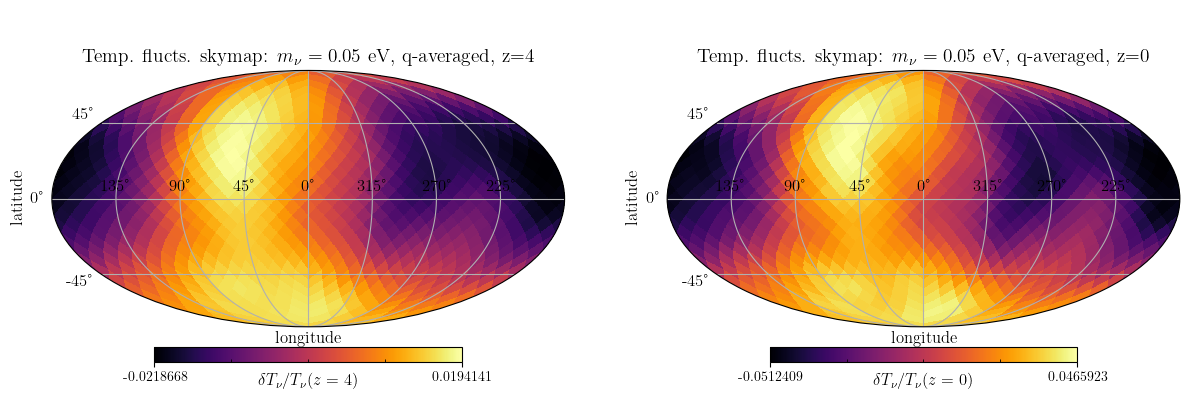

-0.005421774001297425 -0.01402325548387584


In [46]:
fig_paths = [
    f"{fig_folder}/temperature_fluctuations_skymaps_q_average.pdf",
    f"{fig_folder}/temperature_fluctuations_skymaps_q_average.png"
]

Deltas_z4_avg, Deltas_z0_avg = SimPlot.temp_deltas_skymaps_qavg(
    m_Cl=0.05,
    # seed=Primordial.seed, 
    seed=5, 
    Nside=simdata.Nside,
    z4_val=simdata.z4_sim_val,
    Cl_dir=Cl_folder, 
    fig_paths=fig_paths,
    args=Params)

print(Deltas_z4_avg.sum(), Deltas_z0_avg.sum())

In [ ]:
print(f"Values from Tully & Zhang (2021) Fig. 5 left for 0.05 eV and q-averaged:")
conv_unit = Primordial.uK/Params.T_CNB*100
TZ_val_left = -176166*conv_unit
TZ_val_right = 157773*conv_unit
print(f"{TZ_val_left:.4f} to {TZ_val_right:.4f} % of T_CNB")

## Delta vs. redshift plot

/home/fabian/Projects/neutrino_clustering/Shared/specific_CNB_sim.py:1939: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax = fig.add_subplot(111)


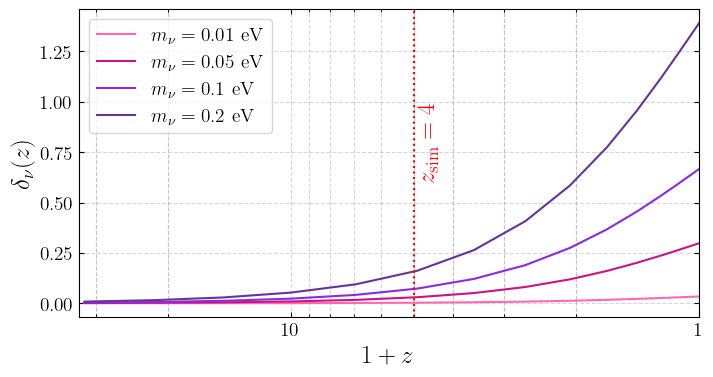

In [35]:
violet_colors = [
    "hotpink", 
    "mediumvioletred", 
    "blueviolet",
    "rebeccapurple",
    "pink",
]

blue_colors = [
    "cyan",
    "deepskyblue",
    "royalblue",
    "mediumblue",
]

red_colors = [
    "orange",
    "tomato",
    "firebrick",
    "darkred",
]

SimPlot.Delta_vs_z_cut(
    m_arr=nu_m_picks[0:4],  # without 0.3 eV, most likely not in the paper
    massless=False,
    m_colors=violet_colors,
    seed=Primordial.seed,
    Nside=simdata.Nside,
    Cl_dir=Cl_folder,
    fig_dir=fig_folder,
    args=Params())


# SimPlot.Delta_vs_z_cut(
#     m_arr=nu_m_picks,  # with "massless" neutrino
#     massless=True,
#     m_colors=violet_colors,
#     seed=Primordial.seed,
#     Nside=simdata.Nside,
#     Cl_dir=Cl_folder,
#     fig_dir=fig_folder,
#     args=Params())

In [ ]:
def Delta_vs_z_cut_show(Cl_dir, m_arr, seed, Nside, args):

    Deltas_l = []
    for m_val in m_arr:
        
        # Load q-averaged Cl's for all z_cuts
        indices = jnp.array([0,9])
        z_cuts_select = Primordial.z_cuts[indices]
        Cls_q_avg_pre = jnp.array([
            jnp.load(f"{Cl_dir}/Cls_q_averaged_z_cut={z_cut:.2f}_m={m_val}eV.npy")
            for z_cut in z_cuts_select])
        # (z_cuts, 20)
        
        # Add the monopole term as 0 and choose a momentum to display
        Cls_q_avg = jnp.insert(Cls_q_avg_pre, 0, 0, axis=1)
        # (z_cuts, 21)
        
        # print(Cls_q_avg.shape)

        # Generate temp. fluctuations map
        for i in range(len(z_cuts_select)):

            np.random.seed(seed)
            Deltas = hp.sphtfunc.synfast(Cls_q_avg[i], nside=Nside, lmax=None, pol=False)

            z_cut_unit = Primordial.uK/(Params.T_CNB * (1+z_cuts_select[i]))
            Deltas *= z_cut_unit
            # print(Deltas.shape)
            Deltas_l.append(Deltas)

    Deltas_arr = jnp.array(Deltas_l)
    print(Deltas_arr.shape)

    Delta_cmap = "inferno"
    dict_z4 = dict(
        title=fr"Temp. flucts. skymap: $m_\nu={m_val}$ eV, q-averaged, z={Primordial.z_cuts[indices[-1]]}", 
        unit=r"$\delta T_\nu / T_\nu (z=4)$",
        cmap=Delta_cmap,
        sub=121)
    dict_z0 = dict(
        title=fr"Temp. flucts. skymap: $m_\nu={m_val}$ eV, q-averaged, z={Primordial.z_cuts[indices[0]]}", 
        unit=r"$\delta T_\nu / T_\nu (z=0)$",
        cmap=Delta_cmap,
        sub=122)

    SimPlot.healpix_side_by_side(
        Deltas_arr[-1], Deltas_arr[0], dict_z4, dict_z0, 
        f"{fig_folder}/Delta_skymaps_m={m_val}eV_q-averaged.pdf", args)

Delta_vs_z_cut_show(
    Cl_dir=Cl_folder,
    m_arr=nu_m_picks[0:1],
    seed=Primordial.seed,
    Nside=simdata.Nside,
    args=Params())

Delta_vs_z_cut_show(
    Cl_dir=Cl_folder,
    m_arr=nu_m_picks[1:2],
    seed=Primordial.seed,
    Nside=simdata.Nside,
    args=Params())

## Comparison of FD & PF skymaps

### For 1 halo with seed 5 (as in T&Z paper)

Sum of PF skymap 58.23473878458462
Sum of FD skymap 58.34369985044461
1.1531889131677822


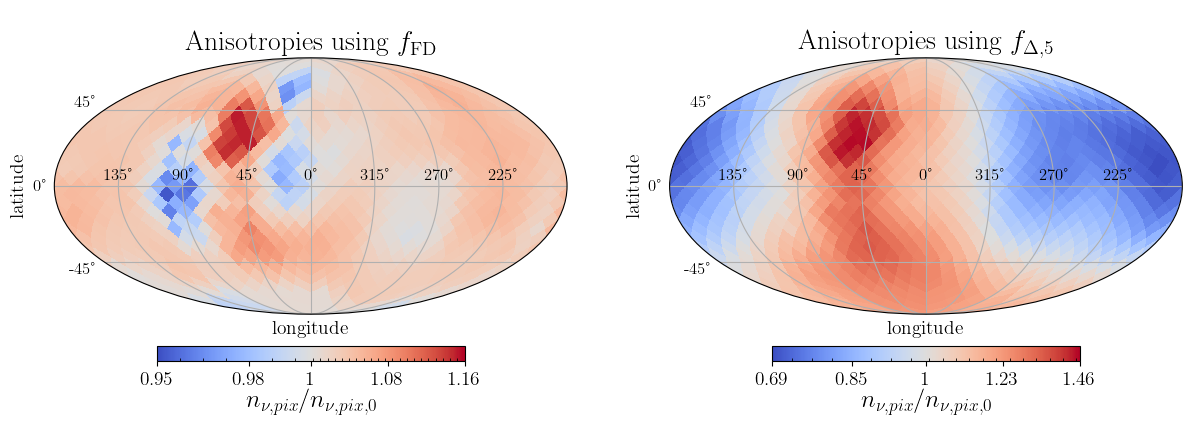

In [161]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# for halo_i in np.arange(start=0, stop=31):
for halo_i in np.arange(start=0, stop=1):

    if halo_i in (20,):
        continue

    # Choose a halo and mass to display
    m_pick = 0.1
    mPF_i = jnp.abs(nu_m_picks - m_pick).argmin()
    mFD_i = jnp.abs(nu_m_picks - m_pick).argmin()

    N0_pix = Params.N0 / simdata.Npix
    skymap_norm = N0_pix / (Params.cm**-3)


    ### ------------------------------------------------------- ###
    ### Plot parameters for Primordial Fluctuations (FD) skymap ###
    ### ------------------------------------------------------- ###

    PF_skymap = pix_dens_PF_halos[halo_i, mPF_i, :] / skymap_norm
    mid_PF = 1.

    # PF_skymap = pix_dens_PF_halos[halo_i, mPF_i, :] - skymap_norm
    # mid_PF = 0.
    
    print(f"Sum of PF skymap", PF_skymap.sum()*skymap_norm)

    cmap = plt.get_cmap('magma')
    colors = cmap(np.linspace(0, 1, 256))
    mid_index = 128  # Middle index
    selected_colors = colors[:mid_index]
    custom_cmap = ListedColormap(selected_colors)

    # Make center value to be 1 or 0 (no overdensity).
    # mid_PF = skymap_norm
    divnorm_PF = mcolors.TwoSlopeNorm(vcenter=mid_PF)

    # Plot style healpy dictionary for right skymap
    hf_min_PF = np.min(PF_skymap)
    hf_left_PF = (np.min(PF_skymap) + mid_PF)/2
    hf_right_PF = (np.max(PF_skymap) + mid_PF)/2
    # print(np.max(PF_skymap))
    hf_max_PF = np.max(PF_skymap)
    hf_max_PF = 1.46 # np.max(PF_skymap) causes arrow in colorbar for 0.1
    # ticks_l_PF = [hf_min_PF, mid_PF, hf_max_PF]  # 0.01
    ticks_l_PF = np.round([hf_min_PF, hf_left_PF, mid_PF, hf_right_PF, hf_max_PF],2)  # 0.1
    # hf_left_PF = (np.min(PF_skymap) + mid_PF)/2
    # hf_right_PF = (np.max(PF_skymap) + mid_PF)/2
    dict_PF = dict(
        title=r"Anisotropies using $f_{\Delta,5}$",
        unit=r"$n_{\nu, pix} / n_{\nu, pix, 0}$",
        cmap="coolwarm",
        # cmap=custom_cmap,
        override_plot_properties={"cbar_pad": 0.08},
        fontsize={
            "title": 20, 
            "xlabel": 14,
            "ylabel": 14,
            "cbar_label": 18,
            "cbar_tick_label": 14,
        },
        cbar_ticks=ticks_l_PF,
        norm=divnorm_PF,
        sub=122)


    ### ------------------------------------------- ###
    ### Plot parameters for Fermi-Dirac (FD) skymap ###
    ### ------------------------------------------- ###

    FD_skymap = pix_dens_FD[halo_i, mFD_i, :] / skymap_norm
    mid_FD = 1.
    
    # FD_skymap = pix_dens_FD[halo_i, mFD_i, :] - skymap_norm
    # mid_FD = 0.
    
    print(f"Sum of FD skymap", FD_skymap.sum()*skymap_norm)

    # Make center value to be 1 or 0 (no overdensity).
    divnorm_FD = mcolors.TwoSlopeNorm(vcenter=mid_FD)

    # Plot style healpy dictionary for left skymap
    hf_min_FD = np.min(FD_skymap)
    hf_left_FD = (np.min(FD_skymap) + mid_FD)/2
    hf_right_FD = (np.max(FD_skymap) + mid_FD)/2
    print(np.max(FD_skymap))
    hf_max_FD = np.max(FD_skymap)
    hf_max_FD = 1.16 # np.max(FD_skymap) causes arrow in colorbar for 0.1
    # ticks_l_FD = [hf_min_FD, mid_FD, hf_max_FD]  # 0.01
    ticks_l_FD = np.round([hf_min_FD, hf_left_FD, mid_FD, hf_right_FD, hf_max_FD],2)  # 0.1
    dict_FD = dict(
        title=fr"Anisotropies using $f_{{\rm FD}}$",
        unit=r"$n_{\nu, pix} / n_{\nu, pix, 0}$",
        cmap="coolwarm",
        override_plot_properties={"cbar_pad": 0.08},
        fontsize={
            "title": 20, 
            "xlabel": 14,
            "ylabel": 14,
            "cbar_label": 18,
            "cbar_tick_label": 14,
        },
        cbar_ticks=ticks_l_FD,
        norm=divnorm_FD,
        sub=121)


    ### ------------ ###
    ### Plot skymaps ###
    ### ------------ ###

    fig_paths = [
        f"{fig_folder}/FD_vs_PF_skymaps_{m_pick}eV.pdf",
        f"{fig_folder}/FD_vs_PF_skymaps_{m_pick}eV.png"
    ]

    SimPlot.healpix_side_by_side(
        map_left=FD_skymap,
        map_right=PF_skymap,
        dict_left=dict_FD,
        dict_right=dict_PF,
        fig_paths=fig_paths,
        args=Params)

In [ ]:
# Choose a halo and mass to display
halo_i = 1
m_pick = 0.1
mPF_i = jnp.abs(nu_m_picks - m_pick).argmin()
mFD_i = jnp.abs(nu_m_range - m_pick).argmin()

N0_pix = Params.N0 / simdata.Npix
skymap_norm = N0_pix / (Params.cm**-3)


### ------------------------------------------------------- ###
### Plot parameters for Primordial Fluctuations (FD) skymap ###
### ------------------------------------------------------- ###

PF_skymap = pix_dens_PF_halos[halo_i, mPF_i, :] / skymap_norm - 1
# print(f"Sum of PF skymap", PF_skymap.sum()*skymap_norm)

# Make center value to be 1 (no overdensity).
mid_PF = 0.
divnorm_PF = mcolors.TwoSlopeNorm(vcenter=mid_PF)

# Plot style healpy dictionary for right skymap
dict_PF = dict(
    title=fr"Overdensities PF of $m_\nu={m_pick}$ eV at z=0", 
    unit=r"$n_{\nu, pix} / n_{\nu, pix, 0}$",
    cmap="coolwarm",
    override_plot_properties={"cbar_pad": 0.1},
    cbar_ticks=[np.min(PF_skymap), mid_PF, np.max(PF_skymap)],
    norm=divnorm_PF,
    sub=122)


### ------------------------------------------- ###
### Plot parameters for Fermi-Dirac (FD) skymap ###
### ------------------------------------------- ###

FD_skymap = pix_dens_FD[halo_i, mFD_i, :] / skymap_norm - 1
# print(f"Sum of FD skymap", FD_skymap.sum())

# Make center value to be 1 (no overdensity).
mid_FD = 0.
divnorm_FD = mcolors.TwoSlopeNorm(vcenter=mid_FD)

# Plot style healpy dictionary for left skymap
dict_FD = dict(
    title=fr"Overdensities FD of $m_\nu={m_pick}$ eV at z=0", 
    unit=r"$n_{\nu, pix} / n_{\nu, pix, 0}$",
    cmap="coolwarm",
    override_plot_properties={"cbar_pad": 0.1},
    cbar_ticks=[np.min(FD_skymap), mid_FD, np.max(FD_skymap)],
    # cbar_ticks=[np.min(PF_skymap), mid_PF, np.max(PF_skymap)],
    norm=divnorm_FD,
    sub=121)


### ------------ ###
### Plot skymaps ###
### ------------ ###

fig_paths = [
    f"{fig_folder}/FD_vs_PF_skymaps_TZseed.pdf",
    f"{fig_folder}/FD_vs_PF_skymaps_TZseed.png"
]

SimPlot.healpix_side_by_side(
    map_left=FD_skymap,
    map_right=PF_skymap,
    dict_left=dict_FD,
    dict_right=dict_PF,
    fig_paths=fig_paths,
    args=Params)

### For 1 halo and a different seed (for sanity check)

In [ ]:
# Choose a halo and mass to display
seed_i = 5
halo_i = 1
m_pick = 0.1
mPF_i = jnp.abs(nu_m_picks - m_pick).argmin()
mFD_i = jnp.abs(nu_m_range - m_pick).argmin()

N0_pix = Params.N0 / simdata.Npix
skymap_norm = N0_pix / (Params.cm**-3)


### ------------------------------------------------------- ###
### Plot parameters for Primordial Fluctuations (FD) skymap ###
### ------------------------------------------------------- ###

PF_skymap = pix_dens_PF_seeds[seed_i, mPF_i, :] / skymap_norm
print(f"Sum of PF skymap", PF_skymap.sum()*skymap_norm)

# Make center value to be 1 (no overdensity).
mid_PF = 1.
divnorm_PF = mcolors.TwoSlopeNorm(vcenter=mid_PF)

# Plot style healpy dictionary for right skymap
dict_PF = dict(
    title=fr"Overdensities PF of $m_\nu={m_pick}$ eV at z=0", 
    unit=r"$n_{\nu, pix} / n_{\nu, pix, 0}$",
    cmap="coolwarm",
    override_plot_properties={"cbar_pad": 0.1},
    cbar_ticks=[np.min(PF_skymap), mid_PF, np.max(PF_skymap)],
    norm=divnorm_PF,
    sub=122)


### ------------------------------------------- ###
### Plot parameters for Fermi-Dirac (FD) skymap ###
### ------------------------------------------- ###

FD_skymap = pix_dens_FD[halo_i, mFD_i, :] / skymap_norm
print(f"Sum of FD skymap", FD_skymap.sum()*skymap_norm)

# Make center value to be 1 (no overdensity).
mid_FD = 1.
divnorm_FD = mcolors.TwoSlopeNorm(vcenter=mid_FD)

# Plot style healpy dictionary for left skymap
dict_FD = dict(
    title=fr"Overdensities FD of $m_\nu={m_pick}$ eV at z=0", 
    unit=r"$n_{\nu, pix} / n_{\nu, pix, 0}$",
    cmap="coolwarm",
    override_plot_properties={"cbar_pad": 0.1},
    cbar_ticks=[np.min(FD_skymap), mid_FD, np.max(FD_skymap)],
    # cbar_ticks=[np.min(PF_skymap), mid_PF, np.max(PF_skymap)],
    norm=divnorm_FD,
    sub=121)


### ------------ ###
### Plot skymaps ###
### ------------ ###

SimPlot.healpix_side_by_side(
    map_left=FD_skymap,
    map_right=PF_skymap,
    dict_left=dict_FD,
    dict_right=dict_PF,
    fig_path=fig_folder,
    args=Params)

## Comparison of FD & PF power spectra

$\theta \approx \frac{180^\circ}{\ell}$

In [10]:
# Up to what l is a healpy skymap "valid"? Use formula above.
print(simdata.pix_sr, 4*Params.Pi)
print(jnp.rad2deg(4*Params.Pi), jnp.rad2deg(simdata.pix_sr))
print(Params.Pi/jnp.sqrt(simdata.pix_sr))

0.016362461737446838 12.566370614359172
720.0 0.9374999999999999
24.559840990715724


### All Halos - 1 PF

0.01


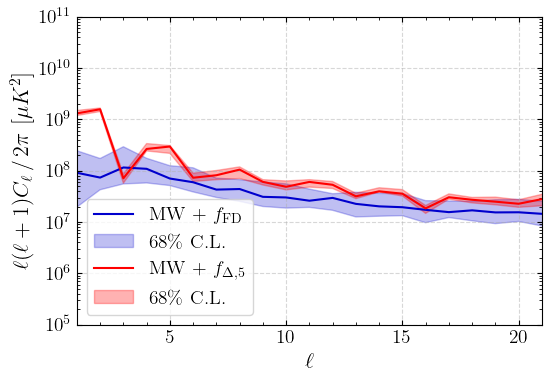

0.1


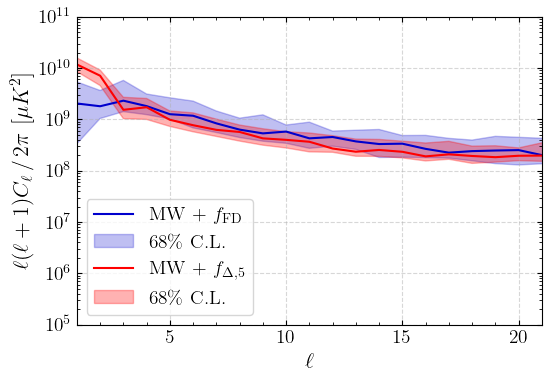

In [4]:
N0_pix = Params.N0 / simdata.Npix
skymap_norm = N0_pix / (Params.cm**-3)
for m_pick in nu_m_picks[0:3:2]:
    print(m_pick)
    SimPlot.power_spectra_FDxPF(
        m_pick=m_pick, 
        pix_dens_FD=pix_dens_FD - skymap_norm, 
        pix_dens_PF=pix_dens_PF_halos - skymap_norm,
        y_lims=(1e5, 1e11),
        sim_dir=sim_folder, 
        fig_dir=fig_folder,
        args=Params,
        Tully=False)

### 1 Halo - 10 PFs

6
0.01


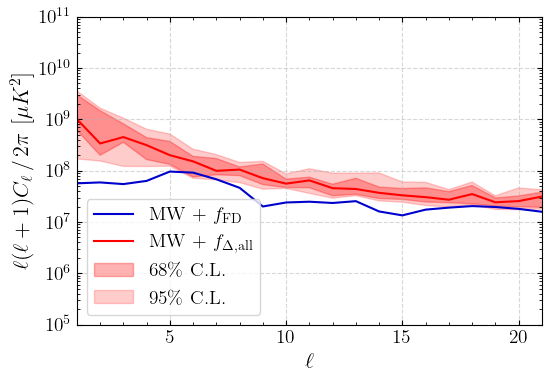

0.1


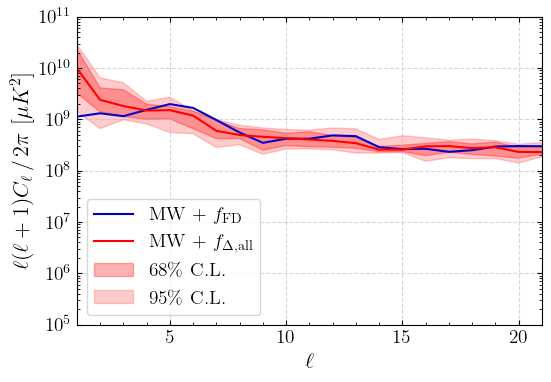

In [6]:
# for halo_i in halo_nums[10:]:
for halo_i in jnp.arange(6,7):

    # halo_i == 6 (so jnp.arange(6,7)) is in paper
    print(halo_i)
    # print(pix_dens_PF_seeds[halo_i,...].shape)

    N0_pix = Params.N0 / simdata.Npix
    skymap_norm = N0_pix / (Params.cm**-3)
    pix_dens_FD_1Halo = jnp.repeat(pix_dens_FD[halo_i-1][None,...], 10, axis=0)

    for m_pick in nu_m_picks[0:3:2]:
        print(m_pick)
        SimPlot.power_spectra_FDxPF(
            m_pick=m_pick, 
            pix_dens_FD=pix_dens_FD_1Halo - skymap_norm, 
            pix_dens_PF=pix_dens_PF_seeds[halo_i] - skymap_norm,
            y_lims=(1e5, 1e11),
            sim_dir=sim_folder,
            fig_dir=fig_folder,
            args=Params,
            _1Halo=True,
            Elbers=False,
            Tully=False)

### Ultimate uncertainties

0.01


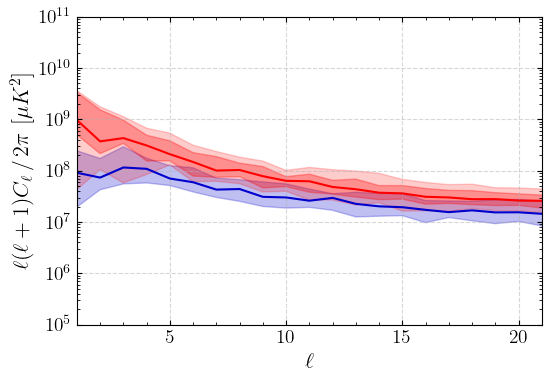

0.1


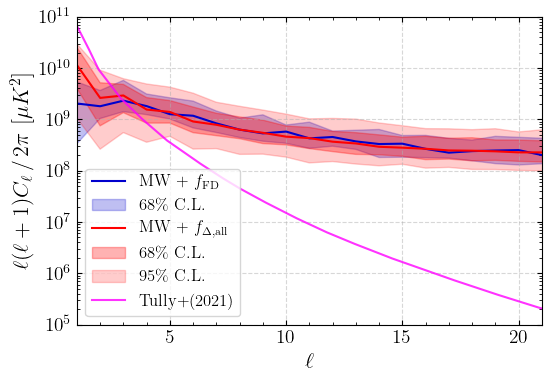

In [162]:
N0_pix = Params.N0 / simdata.Npix
skymap_norm = N0_pix / (Params.cm**-3)
# for m_pick in nu_m_picks[0:3]:
for m_pick in nu_m_picks[0:3:2]:
    print(m_pick)
    SimPlot.power_spectra_FDxPF_ALL(
        m_pick=m_pick, 
        pix_dens_FD=pix_dens_FD - skymap_norm, 
        pix_dens_PF=jnp.swapaxes(pix_dens_PF_seeds, 1,2) - skymap_norm, 
        y_lims=(1e5, 1e11),
        sim_dir=sim_folder, 
        fig_dir=fig_folder,
        args=Params,
        Tully=True)

## Percentage in certain velocity range

In [ ]:
def compute_percentages(v_arr, v_min, v_max, m_arr, args):

    vels_z0 = v_arr[:, 0, :]

    # Condition for having neutrinos with velocities in range, today
    mags_z0 = jnp.linalg.norm(vels_z0, axis=-1)*args.kpc/args.s
    cond = (v_min <= mags_z0) & (mags_z0 <= v_max)

    vels_range = v_arr[cond, ...]

    # Compute number densities for neutrinos in velocity range
    dens_range = Physics.number_densities_mass_range(
        vels_range, m_arr, 4*args.Pi, args)

    dens_total = Physics.number_densities_mass_range(
        v_arr, m_arr, 4*args.Pi, args)

    # Percentages 
    perc_range = dens_range/dens_total*100
    percs = [f"{perc:.3f}" for perc in perc_range]
    print(percs)


# Pick a halo
halo_i = 1

# Load velocities
vels = jnp.array(
    [jnp.load(f"{sim_folder}/vectors_halo{i+1}.npy") for i in range(10)]
)[0, ..., 3:].reshape((-1, 2, 3))
# ic(vels.shape)

vels_z0 = vels[:, 0, :]
# ic(vels_z0.shape)

vels_only_z0s = jnp.repeat(jnp.expand_dims(vels_z0, axis=1), repeats=2, axis=1)
# ic(vels_only_z0s.shape)

# Pick velocity range (as in https://arxiv.org/abs/1305.2454), units of c


v_min = 0.01
v_max = 0.14
print(f"Velocities between {v_min}c and {v_max}c :")
print(f"  0.01      0.05       0.1      0.2       0.3   eV")
compute_percentages(v_arr=vels, v_min=v_min, v_max=v_max, m_arr=nu_m_picks, args=Params())
compute_percentages(v_arr=vels_only_z0s, v_min=v_min, v_max=v_max, m_arr=nu_m_picks, args=Params())

print("\n")

v_min = 0.001
v_max = 0.01
print(f"Velocities between {v_min}c and {v_max}c :")
print(f"  0.01      0.05       0.1      0.2       0.3   eV")
compute_percentages(v_arr=vels, v_min=v_min, v_max=v_max, m_arr=nu_m_picks, args=Params())
compute_percentages(v_arr=vels_only_z0s, v_min=v_min, v_max=v_max, m_arr=nu_m_picks, args=Params())

## Momentum distributions

In [ ]:
def momentum_distribution(y_arr, nbins, args):
    """
    Plot a momentum histogram with logarithmically spaced bins.
    """

    # Generating logarithmically spaced bins
    log_bins = np.logspace(
            np.log10(np.min(y_arr)), np.log10(np.max(y_arr)), nbins)

    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Plot simulation distances
    ax.hist(
        y_arr, bins=log_bins, 
        color="blue", label="CNB simulation", alpha=0.8)
    
    ax.set_xscale("log")
    ax.set_title("Momentum distribution at z=4 (Log Bins)")
    ax.set_xlabel(r"$p_\mathrm{back}/T_\mathrm{CNB,0}$")
    ax.set_ylabel("Nr. of neutrinos")
    ax.legend(loc="upper left")

    plt.show(); plt.close()


# Load neutrino vectors for specified halo
halo = 1
nu_vectors = jnp.load(f'{sim_folder}/vectors_halo{halo}.npy')

# Convert to momenta
v_arr = nu_vectors[...,3:]
p_arr, y_arr = Physics.velocities_to_momenta_all_sky(
    v_arr, nu_m_picks, Params())

for m_idx in range(len(nu_m_picks)):
# for m_idx in range(1):

    # Set up plot parameters
    z0_y_arr = y_arr[m_idx, ..., 0].reshape(-1,)
    z4_y_arr = y_arr[m_idx, ...,-1].reshape(-1,)#/(1+4)
    nbins = 50

    # Generating logarithmically spaced bins
    log_bins = np.logspace(
            np.log10(np.min(z0_y_arr)), np.log10(np.max(z0_y_arr)), nbins)

    # fig = plt.figure()
    # ax = fig.add_subplot(111)

    print("**************************************")
    print("Momentum endpoints for Cl(q) generation:")
    print(f"z0: Min = {jnp.min(z0_y_arr)} T_CNB ; Max = {jnp.max(z0_y_arr)} T_CNB")
    print(f"z4: Min = {jnp.min(z4_y_arr)} T_CNB ; Max = {jnp.max(z4_y_arr)} T_CNB")
    print("**************************************\n")

    # print('#? are the highest momenta affected by gravity? If yes how much?')
    # last_x = 5
    # print(jnp.count_nonzero(jnp.abs(z0_y_arr[-last_x:] - z4_y_arr[-last_x:])))
    # diff_high = jnp.abs(z0_y_arr[-last_x:] - z4_y_arr[-last_x:])
    # print(diff_high/z0_y_arr[-last_x:])
    # print('very little difference!\n')

    # print('#? are the lowest momenta affected by gravity? If yes how much?')
    # first_x = 5
    # print(jnp.count_nonzero(jnp.abs(z0_y_arr[:first_x] - z4_y_arr[:first_x])))
    # diff_low = jnp.abs(z0_y_arr[:first_x] - z4_y_arr[:first_x])
    # print(diff_low/z0_y_arr[:first_x])
    # print('more than 1 order of magnitude bigger difference than for higher momenta!\n')
    
    # note: all masses are affected the same due to the nature of gravity, i.e. the fractional differences for the z0/z4 momenta are the same for all masses.
    
    """
    # Sample Fermi-Dirac momenta
    samples = 1_000
    max_p = jnp.max(z0_y_arr*Params.T_CNB)
    print(f"Maximum momentum for Fermi-Dirac sampling = {max_p/Params.T_CNB:.4f} [T_CNB]\n")
    FD_momenta_z0 = Physics.sample_Fermi_Dirac_momentum(
        N=samples, T=Params.T_CNB, p_norm=max_p)
    # p_norm is the maximum momentum sampled, and is used for normalization

    FD_momenta_z4 = FD_momenta_z0*(1+4)

    # Randomly draw from simulation momenta, to match number of Fermi-Dirac samples
    z0_y_sync = jax.random.choice(Params.key, z0_y_arr, shape=(samples,), replace=False)
    z4_y_sync = jax.random.choice(Params.key, z4_y_arr, shape=(samples,), replace=False)

    # Plot momenta
    ax.hist(z0_y_sync, bins=log_bins, color="blue", label="Sim z=0", alpha=0.7)
    ax.hist(z4_y_sync, bins=log_bins, color="red", label="Sim z=4", alpha=0.7)
    ax.hist(FD_momenta_z4/Params.T_CNB, bins=log_bins, color="orange", label="FD z=4", alpha=0.7)

    ax.set_xscale("log")
    ax.set_title(rf"Momentum distribution (Log Bins) for $m_{{\nu}}={nu_m_picks[m_idx]}$")
    ax.set_xlabel(r"$p_\mathrm{back}/T_\mathrm{CNB,0}$")
    ax.set_ylabel("Nr. of neutrinos")
    ax.legend(loc="upper left")

    plt.show(); plt.close()
    """

## Percentage inside virial radius

In [19]:
jnp.load("sim_output/Dopri5_1k/vectors_halo1.npy").shape

(768, 1000, 2, 6)

In [54]:
from scipy.spatial import cKDTree

def reduce_cells(cell_centers, target_n, k_neighbors=10):
    """
    Reduce the number of cells while preserving regions of higher cell density.
    
    Parameters:
    cell_centers (np.array): Array of shape (N, 3) containing cell center coordinates.
    target_n (int): Target number of cells after reduction.
    k_neighbors (int): Number of neighbors to consider for density estimation.
    
    Returns:
    np.array: Reduced array of cell centers with shape (target_n, 3).
    """
    N = len(cell_centers)
    if target_n >= N:
        return cell_centers[:target_n]  # Return all cells if target_n is greater or equal
    
    # Create a KD-tree for efficient nearest neighbor search
    tree = cKDTree(cell_centers)
    
    # Estimate local density for each cell
    distances, _ = tree.query(cell_centers, k=k_neighbors)
    local_density = 1 / np.mean(distances, axis=1)
    
    # Normalize densities to use as weights
    weights = local_density / np.sum(local_density)
    
    # Use weights to select cells
    selected_indices = np.random.choice(N, size=target_n, replace=False, p=weights)
    
    return cell_centers[selected_indices]


def fibonacci_sphere(samples, radius=1):
    """Generate points on a sphere using the Fibonacci spiral method."""
    points = []
    phi = np.pi * (3. - np.sqrt(5.))  # golden angle in radians
    for i in range(samples):
        y = 1 - (i / float(samples - 1)) * 2  # y goes from 1 to -1
        radius_at_y = np.sqrt(1 - y * y)  # radius at y
        theta = phi * i  # golden angle increment
        x = np.cos(theta) * radius_at_y
        z = np.sin(theta) * radius_at_y
        points.append((x * radius, y * radius, z * radius))
    return np.array(points)


def select_spherical_grid(cell_centers, target_n, n_shells=10):
    """
    Select cells from the original grid to form a spherically symmetric grid.
    
    Parameters:
    cell_centers (np.array): Array of shape (N, 3) containing cell center coordinates.
    target_n (int): Target number of cells in the final grid.
    n_shells (int): Number of spherical shells to use.
    
    Returns:
    np.array: Selected cell centers forming a spherically symmetric grid.
    """
    # Find the center and maximum radius of the original grid
    center = np.mean(cell_centers, axis=0)
    max_radius = np.max(np.linalg.norm(cell_centers - center, axis=1))
    
    # Create KD-Tree for efficient nearest neighbor search
    tree = cKDTree(cell_centers)
    
    selected_cells = []
    cells_per_shell = target_n // n_shells
    
    for i in range(n_shells):
        radius = max_radius * (i + 1) / n_shells
        # Generate points on the sphere for this shell
        sphere_points = fibonacci_sphere(cells_per_shell, radius) + center
        
        # Find the nearest cells to these points
        _, indices = tree.query(sphere_points)
        selected_cells.extend(cell_centers[indices])
    
    # If we haven't reached target_n, add more cells from the last shell
    while len(selected_cells) < target_n:
        extra_points = fibonacci_sphere(target_n - len(selected_cells), max_radius) + center
        _, indices = tree.query(extra_points)
        selected_cells.extend(cell_centers[indices])
    
    return np.array(selected_cells[:target_n])


def plot_grids(cell_centers, reduced_centers):

    # Create the figure and 3D axes
    fig = plt.figure(figsize=(20, 10))

    # Original grid plot
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(cell_centers[:, 0], cell_centers[:, 1], cell_centers[:, 2], 
                c='blue', s=1, alpha=0.5)
    ax1.set_title(f'Original Grid\n{len(cell_centers)} cells')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')

    # Pruned grid plot
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(reduced_centers[:, 0], reduced_centers[:, 1], reduced_centers[:, 2], 
                c='red', s=1, alpha=0.5)
    ax2.set_title(f'Pruned Grid\n{len(reduced_centers)} cells')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')

    # Ensure the same scale for both plots
    x_lim = (min(cell_centers[:, 0].min(), reduced_centers[:, 0].min()),
            max(cell_centers[:, 0].max(), reduced_centers[:, 0].max()))
    y_lim = (min(cell_centers[:, 1].min(), reduced_centers[:, 1].min()),
            max(cell_centers[:, 1].max(), reduced_centers[:, 1].max()))
    z_lim = (min(cell_centers[:, 2].min(), reduced_centers[:, 2].min()),
            max(cell_centers[:, 2].max(), reduced_centers[:, 2].max()))

    ax1.set_xlim(x_lim)
    ax1.set_ylim(y_lim)
    ax1.set_zlim(z_lim)
    ax2.set_xlim(x_lim)
    ax2.set_ylim(y_lim)
    ax2.set_zlim(z_lim)

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()

In [60]:
# See typical number of cells zt z=0
cell_grid = jnp.load("Data/halo_grids/cell_com_origID20_snap_0036.npy")/Params.kpc
print(cell_grid.shape)
cell_grid_pruned = reduce_cells(cell_grid, target_n=300, k_neighbors=len(cell_centers))
print(cell_grid_pruned.shape)

# plot_grids(cell_grid, cell_grid_pruned)

(2878, 3)
(300, 3)


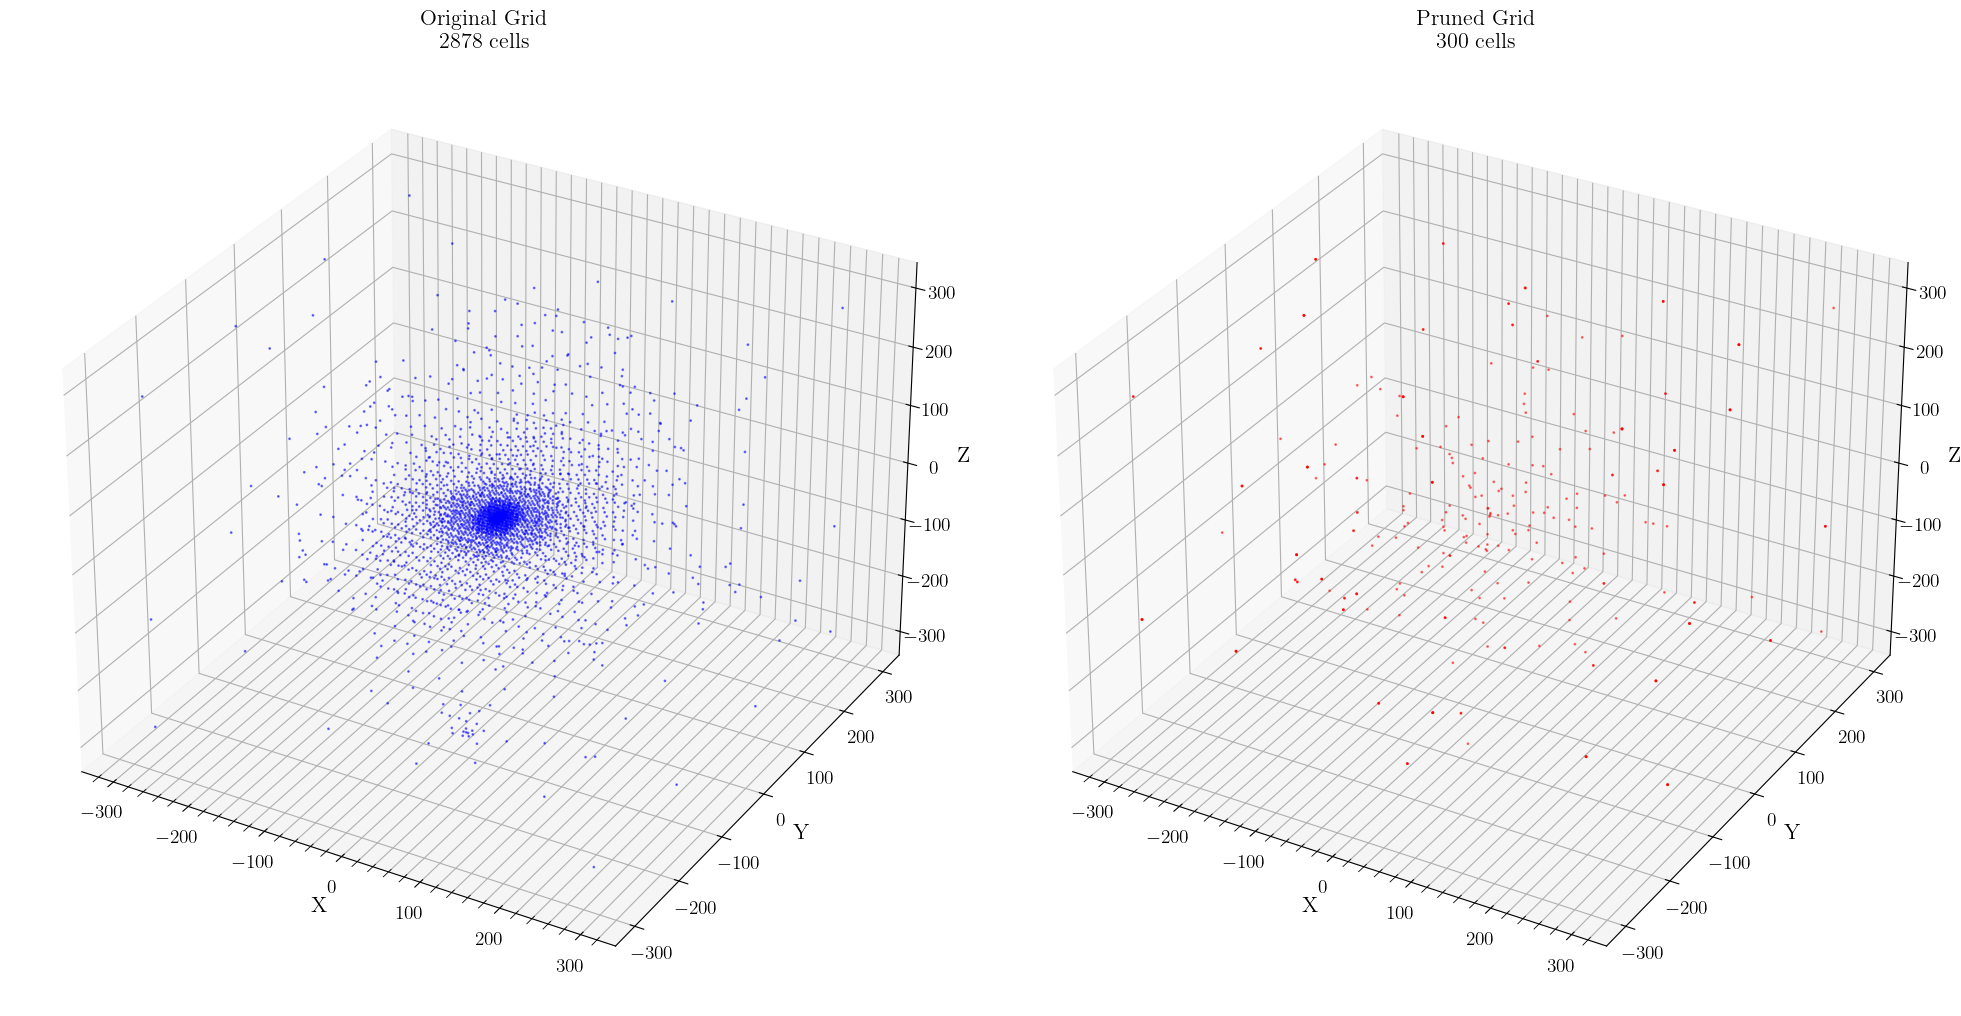

In [86]:
spherical_grid = select_spherical_grid(cell_grid, target_n=300, n_shells=10)
plot_grids(cell_grid, spherical_grid)

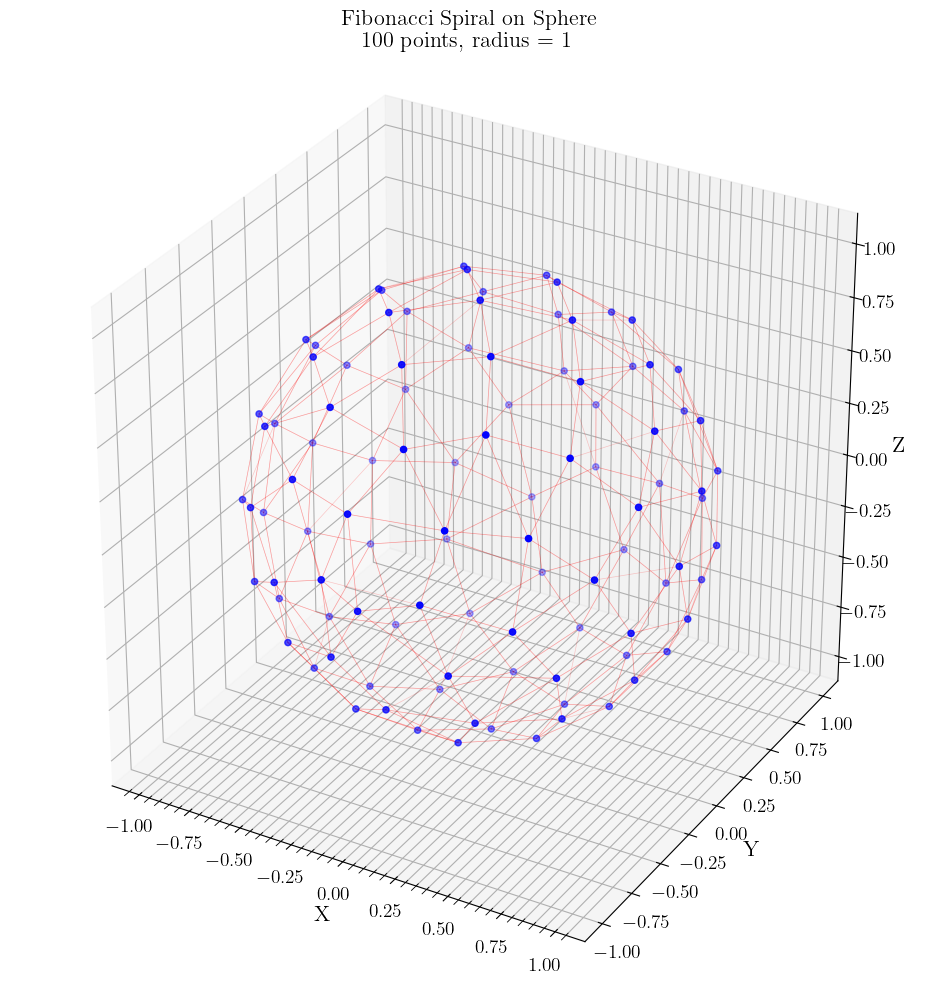

In [76]:
def plot_fibonacci_sphere_layer(n_points, radius=1, show_sphere=True, show_lines=True, n_neighbors=5):
    """
    Plot a single layer of points on a sphere using the Fibonacci spiral method,
    with a surface lattice connecting neighboring points.
    
    Parameters:
    n_points (int): Number of points to plot on the sphere.
    radius (float): Radius of the sphere.
    show_lines (bool): If True, show lines connecting neighboring points on the surface.
    n_neighbors (int): Number of nearest neighbors to connect for each point.
    """
    # Generate points
    points = fibonacci_sphere(n_points, radius)
    
    # Create the figure and 3D axes
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the points
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', s=20)
    
    # Plot the connecting lines if requested
    if show_lines:
        # Use KDTree to find nearest neighbors
        tree = cKDTree(points)
        
        # Find k nearest neighbors for each point
        distances, indices = tree.query(points, k=n_neighbors+1)  # +1 because the point itself is included
        
        # Plot lines to neighbors
        for i, neighbors in enumerate(indices):
            for neighbor in neighbors[1:]:  # Skip the first neighbor (which is the point itself)
                ax.plot(*zip(points[i], points[neighbor]), color='red', linewidth=0.5, alpha=0.2)
    
    # Plot the sphere if requested
    if show_sphere:
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        x = radius * np.cos(u) * np.sin(v)
        y = radius * np.sin(u) * np.sin(v)
        z = radius * np.cos(v)
        ax.plot_wireframe(x, y, z, color="g", alpha=0.1)
    
    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Fibonacci Spiral on Sphere\n{n_points} points, radius = {radius}')
    
    # Set aspect ratio to be equal
    ax.set_box_aspect((1,1,1))
    
    # Show the plot
    plt.tight_layout()
    plt.show()


plot_fibonacci_sphere_layer(
    100, radius=1, show_sphere=False, show_lines=True, n_neighbors=5)

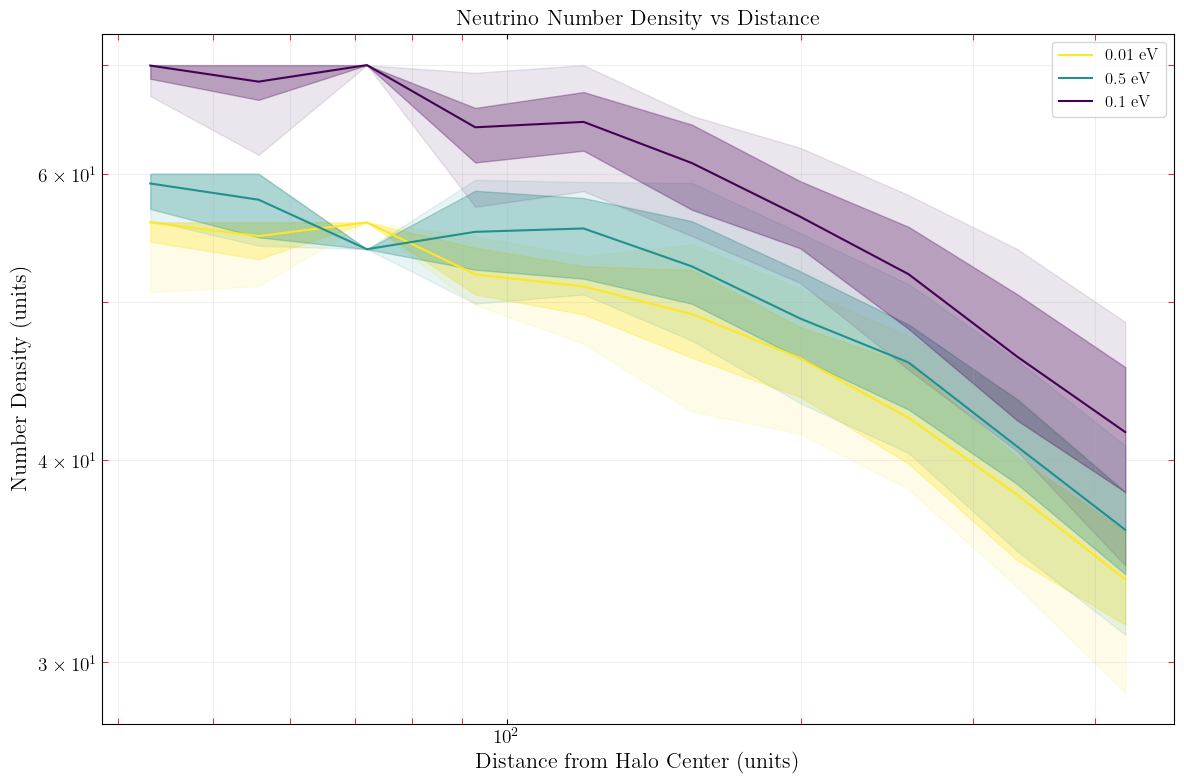

In [95]:
def plot_neutrino_density_OLD(
        density_array, grid_coordinates, halo_index=0, mass_labels=None):
    """
    Plot neutrino number density vs distance from halo center for different neutrino masses.
    
    Parameters:
    density_array (np.array): Array of shape (H, C, M) containing neutrino densities.
                              H: number of halos, C: number of cells, M: number of neutrino masses.
    grid_coordinates (np.array): Array of shape (C, 3) containing x, y, z coordinates of cell centers
                                 with respect to the halo center.
    halo_index (int): Index of the halo to plot (default is 0).
    mass_labels (list): List of labels for different neutrino masses (optional).
    """
    # Calculate distances from the halo center for each cell
    distances = np.linalg.norm(grid_coordinates, axis=1)
    
    # Sort cells by distance
    sorted_indices = np.argsort(distances)
    sorted_distances = distances[sorted_indices]
    sorted_densities = density_array[halo_index, sorted_indices, :]
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot for each neutrino mass
    num_masses = density_array.shape[2]
    colors = plt.cm.viridis(np.linspace(0, 1, num_masses))
    
    for i in range(num_masses):
        label = f"Mass {i+1}" if mass_labels is None else mass_labels[i]
        plt.plot(sorted_distances, sorted_densities[:, i], color=colors[i], label=label)
    
    plt.xlabel("Distance from Halo Center (units)")
    plt.ylabel("Number Density (units)")
    plt.title(f"Neutrino Number Density vs Distance for Halo {halo_index}")
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which="both", ls="-", alpha=0.2)
    
    plt.tight_layout()
    plt.show()


def plot_neutrino_density(density_array, spherical_grid, mass_labels=None, num_bins=50):
    """
    Plot neutrino number density vs distance from halo center for different neutrino masses.
    Includes median and percentile bands across multiple halos.
    
    Parameters:
    density_array (np.array): Array of shape (H, C, M) containing neutrino densities.
                              H: number of halos, C: number of cells, M: number of neutrino masses.
    spherical_grid (np.array): Array of shape (C, 3) containing x, y, z coordinates of cell centers.
    mass_labels (list): List of labels for different neutrino masses (optional).
    num_bins (int): Number of distance bins for calculating percentiles.
    """
    # Calculate distances from the halo center for each cell
    distances = np.linalg.norm(spherical_grid, axis=1)
    
    # Create distance bins
    bin_edges = np.logspace(np.log10(distances.min()), np.log10(distances.max()), num_bins+1)
    bin_centers = np.sqrt(bin_edges[:-1] * bin_edges[1:])
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot for each neutrino mass
    num_masses = density_array.shape[2]
    colors = plt.cm.viridis(np.linspace(0, 1, num_masses))[::-1]
    
    for m in range(num_masses):
        medians = []
        lower_68 = []
        upper_68 = []
        lower_95 = []
        upper_95 = []
        
        for i in range(num_bins):
            mask = (distances >= bin_edges[i]) & (distances < bin_edges[i+1])
            if np.sum(mask) > 0:
                densities_in_bin = density_array[:, mask, m].flatten()
                medians.append(np.median(densities_in_bin))
                lower_68.append(np.percentile(densities_in_bin, 16))
                upper_68.append(np.percentile(densities_in_bin, 84))
                lower_95.append(np.percentile(densities_in_bin, 2.5))
                upper_95.append(np.percentile(densities_in_bin, 97.5))
            else:
                medians.append(np.nan)
                lower_68.append(np.nan)
                upper_68.append(np.nan)
                lower_95.append(np.nan)
                upper_95.append(np.nan)
        
        label = f"Mass {m+1}" if mass_labels is None else mass_labels[m]
        ax.plot(bin_centers, medians, color=colors[m], label=label)
        ax.fill_between(bin_centers, lower_68, upper_68, color=colors[m], alpha=0.3)
        ax.fill_between(bin_centers, lower_95, upper_95, color=colors[m], alpha=0.1)
    
    ax.set_xlabel("Distance from Halo Center (units)")
    ax.set_ylabel("Number Density (units)")
    ax.set_title("Neutrino Number Density vs Distance")
    ax.legend()
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(True, which="both", ls="-", alpha=0.2)
    
    # Add minor ticks
    ax.xaxis.set_minor_locator(plt.LogLocator(base=10, subs=np.arange(1, 10) * 0.1, numticks=10))
    ax.yaxis.set_minor_locator(plt.LogLocator(base=10, subs=np.arange(1, 10) * 0.1, numticks=10))
    ax.tick_params(which='minor', length=4, color='r')
    
    plt.tight_layout()
    plt.show()


def generate_test_data(spherical_grid, num_halos, num_masses):
    """
    Generate test data for neutrino density plot using a provided spherical grid.
    Densities are highest near the center and decrease with distance.
    Base densities are set to 56, 60, and 70 for 0.01, 0.05, and 0.1 eV neutrinos respectively.
    
    Parameters:
    spherical_grid (np.array): Array of shape (C, 3) containing x, y, z coordinates of cell centers
    num_halos (int): Number of halos
    num_masses (int): Number of neutrino masses (should be 3 for this specific case)
    
    Returns:
    np.array: density_array of shape (num_halos, num_cells, num_masses)
    """
    num_cells = len(spherical_grid)
    
    # Calculate distances from center
    distances = np.linalg.norm(spherical_grid, axis=1)
    
    # Normalize distances to range [0, 1] for density calculation
    normalized_distances = (distances - distances.min()) / (distances.max() - distances.min())
    
    # Generate density array
    density_array = np.zeros((num_halos, num_cells, num_masses))
    
    # Base densities for each neutrino mass
    base_densities = [56, 60, 70]  # for 0.01, 0.05, and 0.1 eV respectively
    
    for h in range(num_halos):
        for m in range(num_masses):
            # Base density decreases with distance
            density = base_densities[m] * (1 - 0.5 * normalized_distances)
            
            # Add some random variation for each halo
            noise = np.random.normal(0, 0.05 * base_densities[m], num_cells)
            
            # Ensure density remains positive and doesn't exceed base density
            density = np.clip(density + noise, 0, base_densities[m])
            
            density_array[h, :, m] = density
    
    return density_array


# Generate test data
# num_halos, num_masses = 5, 3
# density_array = generate_simple_test_data(spherical_grid, num_halos, num_masses)

# Example of how to use the test data with the plotting function
# (assuming the plotting function is defined as before)
# mass_labels = ["0.1 eV", "0.05 eV", "0.01 eV"]
# plot_neutrino_density(density_array, spherical_grid, halo_index=0, mass_labels=mass_labels)

num_halos, num_masses = 1, 3
density_array = generate_test_data(spherical_grid, num_halos, num_masses)
mass_labels = ["0.01 eV", "0.5 eV", "0.1 eV"]
plot_neutrino_density(
    density_array, spherical_grid, mass_labels=mass_labels, num_bins=10)